# 📈 **Cohort Analysis Metrics for Ironhack Payments**
### **Ironhack Data Science and Machine Learning Bootcamp**  
📅 **Date:** December 12, 2024  
📅 **Submission Date:** December 13, 2024  
👩‍💻 **Author:** Ginosca Alejandro Dávila  

---

## **📌 Notebook Overview**

This notebook performs a **cohort-based analysis** using the aggregated outputs and cleaned datasets from earlier phases.  
It builds on insights generated during the **Exploratory Data Analysis (EDA)** and focuses on tracking **user behavior and financial performance over time**.

📓 For dataset context, cleaning steps, and EDA insights, refer to:
- 1_data_cleaning_ironhack_payments.ipynb  
- 2_eda_ironhack_payments.ipynb

🧾 _Users are grouped into cohorts based on the month of their **first cash request**._  
We evaluate how these cohorts evolve in terms of service usage, incident rates, and revenue generation.

---

### 📊 Metrics Analyzed per Cohort

- 🔁 **Frequency of Service Usage**  
  Understand how often users from each cohort utilize Ironhack Payments’ services over time.

- ⚠️ **Incident Rate**  
  Determine the proportion of requests that resulted in incidents (e.g., payment failures, postponements).

- 💰 **Revenue Generated**  
  Track monthly and cumulative revenue produced by each cohort.

- 💡 **Custom Insightful Metric**  
  A new relevant metric proposed to provide additional insight into user behavior or platform performance.

These metrics help identify high-value cohorts, uncover behavioral trends, and guide data-driven decision-making.

---

## **📂 Input Data**

📁 eda_outputs/data/ – Aggregated .csv files from the previous notebook:  
- ✅ user_first_request.csv → First request and cohort month per user  
- ✅ monthly_active_users.csv → Count of active users by month  
- ✅ transfer_type_share.csv → Monthly share of transfer types  
- ✅ merged_cash_fee.csv → Combined dataset of cash requests and associated fees  

Each dataset supports the definition of cohorts and the calculation of behavioral and financial metrics.

---

## **💾 Output Destination**

📁 cohort_outputs/  
├── 📂 plots/ → Visualizations of cohort metrics (.png)  
├── 📂 data/ → Calculated tables for each metric (.csv)  

These outputs support final reporting, presentations, and dashboard development.

---

## **🎯 Goals**

✔ Assign users to cohorts by first request month  
✔ Compute cohort-level metrics over time  
✔ Visualize and interpret behavioral patterns and business impact  
✔ Export all outputs for use in the final dashboard or report  

---

📊 **Let’s get started with the cohort metrics!**

---

## 🗂️ Step 1: Mount Google Drive and Set Project Path

This step ensures the notebook is compatible with both **Google Colab** and **local environments**.

- 📦 If running in **Colab**, you'll be prompted to input your Drive path relative to `/content/drive/`.
- 💻 If running **locally**, the base path will be detected from the script's location automatically.

The base path should point to your project folder:  
`project-1-ironhack-payments-2-en/`


In [1]:
import sys
import os

# ✅ Safe print to avoid encoding issues
def safe_print(text):
    try:
        print(text)
    except UnicodeEncodeError:
        print(text.encode("ascii", errors="ignore").decode())

# ✅ Check for Colab environment
def is_colab():
    return 'google.colab' in sys.modules

# ✅ Set base path dynamically
if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')

    # Try default user path (adjustable)
    default_path = 'MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en'
    full_default_path = os.path.join('/content/drive', default_path)

    if os.path.exists(full_default_path):
        project_base_path = full_default_path
        safe_print(f"✅ Colab project path set to: {project_base_path}")
    else:
        safe_print("\n📂 Default path not found. Please input the relative path to your project inside Google Drive.")
        safe_print("👉 Example: 'MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en'")
        user_path = input("📥 Your path: ").strip()
        project_base_path = os.path.join('/content/drive', user_path)

        if not os.path.exists(project_base_path):
            raise FileNotFoundError(f"❌ Path does not exist: {project_base_path}\nPlease check your input.")

        safe_print(f"✅ Colab project path set to: {project_base_path}")
else:
    try:
        script_dir = os.path.dirname(os.path.abspath(__file__))
    except NameError:
        script_dir = os.getcwd()

    # Assume script is inside /scripts/ and go two levels up
    project_base_path = os.path.abspath(os.path.join(script_dir, '..', '..'))
    safe_print(f"✅ Local environment detected. Base path set to: {project_base_path}")


Mounted at /content/drive
✅ Colab project path set to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en


---

## 📥 Step 2: Load Aggregated EDA Outputs

We now load the `.csv` outputs generated during exploratory analysis in Notebook 2.  
These datasets are **already cleaned, aggregated, and ready** for cohort-based metric calculations.

📁 All files are located in:  
`eda_outputs/data/`

The following files will be used:
- 🧍‍♂️ `user_first_request.csv` → Maps users to their first cash request and cohort month  
- 📆 `monthly_active_users.csv` → Tracks how many users were active each month  
- 🔁 `transfer_type_share.csv` → Monthly distribution of instant vs regular transfers  
- 💰 `merged_cash_fee.csv` → Unified cash+fee dataset with timestamps, amounts, statuses, and incident flags  


In [2]:
import pandas as pd
import os

# 📂 Define EDA output directory path
eda_data_path = os.path.join(project_base_path, 'eda_outputs', 'data')

# 🗂️ Define file paths
eda_files = {
    'user_first_request': 'user_first_request.csv',
    'monthly_active_users': 'monthly_active_users.csv',
    'transfer_type_share': 'transfer_type_share.csv',
    'merged_cash_fee': 'merged_cash_fee.csv',
}

# 📥 Load each file into a DataFrame with error handling
dataframes = {}
safe_print("📄 Loading EDA output files...\n")

for key, filename in eda_files.items():
    file_path = os.path.join(eda_data_path, filename)
    safe_print(f"📁 Looking for: {file_path}")

    try:
        df = pd.read_csv(file_path)
        dataframes[key] = df
        safe_print(f"✅ Loaded {filename} → Shape: {df.shape}")
    except FileNotFoundError:
        safe_print(f"❌ File not found: {file_path}")
        safe_print("📌 Check that the file exists and the name is spelled correctly.")
        raise

# 🔄 Unpack dataframes for easy access
user_first_request_df = dataframes['user_first_request']
monthly_active_users_df = dataframes['monthly_active_users']
transfer_type_share_df = dataframes['transfer_type_share']
merged_df = dataframes['merged_cash_fee']


📄 Loading EDA output files...

📁 Looking for: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data/user_first_request.csv
✅ Loaded user_first_request.csv → Shape: (11793, 4)
📁 Looking for: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data/monthly_active_users.csv
✅ Loaded monthly_active_users.csv → Shape: (13, 3)
📁 Looking for: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data/transfer_type_share.csv
✅ Loaded transfer_type_share.csv → Shape: (13, 4)
📁 Looking for: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/eda_outputs/data/merged_cash_fee.csv
✅ Loaded merged_cash_fee.csv → Shape: (32094, 33)


---

## 🧾 Step 3: Dataset Preview & Structure Overview

Before diving into cohort metrics, let's inspect the structure and content of each input file.

We'll use a reusable helper function to display:
- 👁️ First and last rows of the dataset  
- 📐 Number of rows and columns  
- 🧬 Column names, data types, and null counts  
- 🔍 Optionally, the full DataFrame when needed

This helps ensure we understand the schema and spot any inconsistencies before computing metrics.

---


In [3]:
import io

# ✅ Define display fallback for script environments
try:
    display
except NameError:
    def display(x):
        print(x.to_string() if isinstance(x, pd.DataFrame) else x)

# 🔍 Inspect basic structure of a DataFrame with optional previews and toggles
def inspect_basic_structure(df, name="Dataset", preview_rows=5, full=False):
    """
    Display structure, sample rows, schema, and optional full view of a DataFrame.
    Compatible with notebooks and terminal scripts.

    Parameters:
    - df: pandas DataFrame
    - name: Custom name to identify the DataFrame
    - preview_rows: Number of rows to show from head and tail
    - full: If True, display the entire DataFrame
    """
    safe_print(f"🧾 Inspecting: {name}")
    safe_print("=" * 60)

    # 👁️ Preview first N rows
    safe_print(f"🔹 First {preview_rows} Rows:")
    display(df.head(preview_rows))

    # 👁️ Preview last N rows
    safe_print(f"\n🔹 Last {preview_rows} Rows:")
    display(df.tail(preview_rows))

    # 📐 Dataset shape
    safe_print(f"\n🔹 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

    # 🏷️ Column names
    safe_print("\n🔹 Column Names:")
    safe_print(df.columns.tolist())

    # 🧬 Data types and non-null counts
    safe_print("\n🔹 Data Types and Non-Null Counts:")
    buffer = io.StringIO()
    df.info(buf=buffer)
    safe_print(buffer.getvalue())

    # 🧼 Missing values
    safe_print("\n🔹 Missing Values (Null Counts):")
    display(df.isnull().sum())

    # 👁️ Optional: Full DataFrame display
    if full:
        safe_print("\n🔹 Full Data Preview:")
        display(df)

    safe_print("=" * 60 + "\n")


In [4]:
# 🔍 Inspect the user-to-cohort mapping dataset
inspect_basic_structure(user_first_request_df, name="user_first_request.csv")


🧾 Inspecting: user_first_request.csv
🔹 First 5 Rows:


,final_user_id,first_request_date,cohort_month,cohort_year_month
0,34.0,2020-04-20 15:50:21.187257,Apr 2020,2020-04
1,35.0,2019-12-13 20:27:38.106778,Dec 2019,2019-12
2,47.0,2019-11-19 13:57:53.511561,Nov 2019,2019-11
3,52.0,2019-12-17 09:01:12.584634,Dec 2019,2019-12
4,53.0,2019-12-21 11:39:03.844436,Dec 2019,2019-12



🔹 Last 5 Rows:


,final_user_id,first_request_date,cohort_month,cohort_year_month
11788,103425.0,2020-11-01 20:31:53.965482,Nov 2020,2020-11
11789,103437.0,2020-11-01 19:35:00.540424,Nov 2020,2020-11
11790,103496.0,2020-11-01 19:30:26.434400,Nov 2020,2020-11
11791,103503.0,2020-11-01 20:12:26.857203,Nov 2020,2020-11
11792,103719.0,2020-11-01 23:06:44.582445,Nov 2020,2020-11



🔹 Shape: 11,793 rows × 4 columns

🔹 Column Names:
['final_user_id', 'first_request_date', 'cohort_month', 'cohort_year_month']

🔹 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11793 entries, 0 to 11792
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   final_user_id       11793 non-null  float64
 1   first_request_date  11793 non-null  object 
 2   cohort_month        11793 non-null  object 
 3   cohort_year_month   11793 non-null  object 
dtypes: float64(1), object(3)
memory usage: 368.7+ KB


🔹 Missing Values (Null Counts):


,0
final_user_id,0
first_request_date,0
cohort_month,0
cohort_year_month,0


---

## 🧾 `user_first_request.csv` Summary

This dataset provides the **cohort mapping** for each user, identifying the month of their **first cash request**.

Key observations:
- 🧍‍♀️ **Unique Users:** 11,793 (one row per user)
- 🗓️ **Cohort Range:** November 2019 to November 2020
- 🧩 **Columns:**
  - `final_user_id`: Unique user identifier (float)
  - `first_request_date`: Timestamp of the user's first request
  - `cohort_month`: Cohort label derived from the request date

✅ This file is essential for grouping users into **monthly cohorts** for metric calculations.

---


In [5]:
# 🔍 Inspect the Monthly Active Users dataset
inspect_basic_structure(monthly_active_users_df, name="monthly_active_users.csv")


🧾 Inspecting: monthly_active_users.csv
🔹 First 5 Rows:


,activity_month,active_users,activity_month_str
0,2019-11,1,Nov 2019
1,2019-12,255,Dec 2019
2,2020-01,196,Jan 2020
3,2020-02,170,Feb 2020
4,2020-03,215,Mar 2020



🔹 Last 5 Rows:


,activity_month,active_users,activity_month_str
8,2020-07,2711,Jul 2020
9,2020-08,2599,Aug 2020
10,2020-09,3669,Sep 2020
11,2020-10,7191,Oct 2020
12,2020-11,140,Nov 2020



🔹 Shape: 13 rows × 3 columns

🔹 Column Names:
['activity_month', 'active_users', 'activity_month_str']

🔹 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_month      13 non-null     object
 1   active_users        13 non-null     int64 
 2   activity_month_str  13 non-null     object
dtypes: int64(1), object(2)
memory usage: 444.0+ bytes


🔹 Missing Values (Null Counts):


,0
activity_month,0
active_users,0
activity_month_str,0


---

## 🧾 `monthly_active_users.csv` Summary

This dataset reports the **number of unique users** active each month, providing insight into overall platform engagement across time.

Key observations:
- 📅 **Months Covered:** 13 (from November 2019 to November 2020)
- 👥 **Monthly Active Users (MAU):** Ranges from **1** (Nov 2019\*) to **7,191** (Oct 2020)
- 🧩 **Columns:**
  - `activity_month`: Year-month key (e.g., `2020-04`)
  - `active_users`: Count of unique users active that month
  - `activity_month_str`: Formatted month name for visualization

📝 Note: November 2019 and November 2020 are **partial months**, which may explain their lower activity counts. (Marked with \*)

✅ This file will help compute **cohort-based retention** and monitor user participation over time.

---


In [6]:
# 🔍 Inspect the monthly transfer type distribution dataset
inspect_basic_structure(transfer_type_share_df, name="transfer_type_share.csv")


🧾 Inspecting: transfer_type_share.csv
🔹 First 5 Rows:


,month_label,instant,regular,instant_share_percent
0,Nov 2019*,0,1,0.0
1,Dec 2019,0,289,0.0
2,Jan 2020,0,223,0.0
3,Feb 2020,0,184,0.0
4,Mar 2020,0,244,0.0



🔹 Last 5 Rows:


,month_label,instant,regular,instant_share_percent
8,Jul 2020,344,3257,9.552902
9,Aug 2020,2506,911,73.339186
10,Sep 2020,3695,526,87.538498
11,Oct 2020,7208,517,93.307443
12,Nov 2020*,129,11,92.142857



🔹 Shape: 13 rows × 4 columns

🔹 Column Names:
['month_label', 'instant', 'regular', 'instant_share_percent']

🔹 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month_label            13 non-null     object 
 1   instant                13 non-null     int64  
 2   regular                13 non-null     int64  
 3   instant_share_percent  13 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 548.0+ bytes


🔹 Missing Values (Null Counts):


,0
month_label,0
instant,0
regular,0
instant_share_percent,0


---

## 🧾 `transfer_type_share.csv` Summary

This dataset tracks the **monthly count and share of transfer types**, breaking down how often users chose **instant vs regular** transfers over time.

Key observations:
- 📅 **Months Covered:** 13 (from November 2019 to November 2020)
- 🚀 **Instant Share Trends:**
  - Transfers were **100% regular** until **July 2020**
  - Share of **instant transfers rose sharply**, reaching over **93% by October 2020**
- 🧩 **Columns:**
  - `month_label`: Readable format for month (e.g., `Aug 2020`)
  - `instant`: Count of instant transfers that month
  - `regular`: Count of regular transfers that month
  - `instant_share_percent`: Proportion of instant transfers (0–100%)

📝 Note: November 2019 and November 2020 are **partial months** and marked with `\*`.

✅ This file helps identify shifts in **transfer preferences**, useful for evaluating adoption of premium or time-sensitive services.

---


In [7]:
# 🔍 Inspect the merged dataset containing cash requests and associated fees
inspect_basic_structure(merged_df, name="merged_cash_fee.csv")


🧾 Inspecting: merged_cash_fee.csv
🔹 First 5 Rows:


,cash_request_id,final_user_id,amount,cash_status,transfer_type,reimbursement_date,cash_created_at,cash_updated_at,user_id,moderated_at,...,type,fee_status,fee_created_at,category,reason,fee_updated_at,paid_at,from_date,to_date,charge_moment
0,5,804.0,100.0,rejected,regular,2020-01-09 19:05:21.596363,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.407830,804.0,2019-12-11 16:47:42.405646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70,231.0,100.0,rejected,regular,2020-01-09 19:50:12.347780,2019-12-10 19:50:12.347780,2019-12-11 14:24:22.900054,231.0,2019-12-11 14:24:22.897988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,191.0,100.0,rejected,regular,2020-01-09 19:13:35.825041,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773,191.0,2019-12-11 09:46:59.777728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,761.0,99.0,rejected,regular,2020-01-09 19:16:10.879606,2019-12-10 19:16:10.880172,2019-12-18 14:26:18.136163,761.0,2019-12-18 14:26:18.128407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1594,7686.0,100.0,rejected,regular,NaN,2020-05-06 09:59:38.877376,2020-05-07 09:21:55.340080,7686.0,2020-05-07 09:21:55.320193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔹 Last 5 Rows:


,cash_request_id,final_user_id,amount,cash_status,transfer_type,reimbursement_date,cash_created_at,cash_updated_at,user_id,moderated_at,...,type,fee_status,fee_created_at,category,reason,fee_updated_at,paid_at,from_date,to_date,charge_moment
32089,22357,82122.0,100.0,money_back,instant,NaN,2020-10-20 07:58:04.006937,2021-02-05 12:19:30.656816,82122.0,NaN,...,instant_payment,accepted,2020-10-20 07:58:19.637461,NaN,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637491,2021-02-05 12:19:30.685779,NaN,NaN,after
32090,20256,64517.0,100.0,money_back,instant,NaN,2020-10-10 05:40:55.700422,2021-02-05 13:14:19.707627,64517.0,NaN,...,postpone,accepted,2020-10-30 17:08:16.906449,NaN,Postpone Cash Request 20256,2020-10-30 17:08:21.967966,2020-10-30 17:08:21.416796,2020-11-06 11:00:00,2020-12-07 11:00:00,before
32091,20256,64517.0,100.0,money_back,instant,NaN,2020-10-10 05:40:55.700422,2021-02-05 13:14:19.707627,64517.0,NaN,...,instant_payment,accepted,2020-10-10 05:42:11.679401,NaN,Instant Payment Cash Request 20256,2020-10-13 14:25:03.460352,2021-02-05 13:14:19.731397,NaN,NaN,after
32092,19886,44867.0,100.0,direct_debit_sent,instant,NaN,2020-10-08 14:16:52.155661,2021-01-05 15:45:52.645536,44867.0,NaN,...,postpone,accepted,2020-10-10 21:22:00.083739,NaN,Postpone Cash Request 19886,2020-10-13 14:25:18.501716,2020-10-10 21:22:04.456828,2020-11-06 22:00:00,2020-12-06 11:00:00,before
32093,19886,44867.0,100.0,direct_debit_sent,instant,NaN,2020-10-08 14:16:52.155661,2021-01-05 15:45:52.645536,44867.0,NaN,...,instant_payment,accepted,2020-10-08 14:17:09.126909,NaN,Instant Payment Cash Request 19886,2020-10-13 14:25:16.470702,2021-02-11 04:24:07.529815,NaN,NaN,after



🔹 Shape: 32,094 rows × 33 columns

🔹 Column Names:
['cash_request_id', 'final_user_id', 'amount', 'cash_status', 'transfer_type', 'reimbursement_date', 'cash_created_at', 'cash_updated_at', 'user_id', 'moderated_at', 'deleted_account_id', 'cash_request_received_date', 'money_back_date', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update', 'year_month', 'month_label', 'recovery_status_clean', 'incident_flag', 'fee_id', 'total_amount', 'type', 'fee_status', 'fee_created_at', 'category', 'reason', 'fee_updated_at', 'paid_at', 'from_date', 'to_date', 'charge_moment']

🔹 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cash_request_id             32094 non-null  int64  
 1   final_user_id               32094 non-null  float64
 2   amount                      32094 non-

,0
cash_request_id,0
final_user_id,0
amount,0
cash_status,0
transfer_type,0
reimbursement_date,28033
cash_created_at,0
cash_updated_at,0
user_id,2572
moderated_at,10564


---

## 🧾 `merged_cash_fee.csv` Summary

This **merged dataset** brings together cleaned **cash request** and **fee** records and serves as the foundation for calculating cohort-based metrics.

📓 It was created by merging:
- ✅ `clean_cash_requests.csv` and `clean_fees.csv` — both cleaned in **Notebook 1** (`1_data_cleaning_ironhack_payments.ipynb`)
- 🧠 Merged in **Notebook 2** (`2_eda_ironhack_payments.ipynb`) using a **left join** on `cash_request_id` to retain all cash requests

---

📊 **Key Facts:**
- 📐 **Shape:** 32,094 rows × 33 columns  
- 👥 **Cash Requests with at least one fee:** 12,933 unique requests (~53.95%)  
  ⤷ Documented during the merge summary in Notebook 2  
- 🧮 **Column Origins**:
  - 🧾 **Cash Request Fields**: `cash_request_id`, `final_user_id`, `amount`, `cash_status`, `transfer_type`, etc.
  - 💸 **Fee Fields**: `fee_id`, `total_amount`, `type`, `fee_status`, `charge_moment`, etc.
  - 🧠 **Derived Fields**: `incident_flag`, `recovery_status_clean`, `month_label`, `year_month`

---

🔍 **Missing Values Overview:**
- Many **fee-related columns** (e.g., `fee_id`, `total_amount`, `category`) contain ~11K nulls  
  ⤷ These represent cash requests that **did not incur any fees**
- Other nulls (e.g., `reimbursement_date`, `recovery_status`, `paid_at`) reflect **valid business scenarios**  
  ⤷ Explained in detail in **Notebook 1’s** missing value report and column context

---

✅ This merged dataset is fully prepared for:
- 📈 Calculating **monthly and cumulative revenue** by cohort  
- ⚠️ Computing **incident rates** per cohort  
- 🔁 Measuring **frequency of service usage**  
- 📊 Generating cohort-based **visualizations and tables** for strategic insights

---


---

## 🧭 Step 4: Assign Cohort Month to All Transactions

To perform cohort analysis, each transaction must be tagged with the **cohort month** of the user who made the request.  
This enables us to group user behavior over time, relative to their first **cash request**.

We use the file `user_first_request.csv`, which maps each `final_user_id` to:
- The exact date of their **first cash request**
- A preformatted **cohort label** (e.g., `Jan 2020`, `Apr 2020`)

### 🧬 Merge Strategy

- We perform a **left join** between `merged_cash_fee.csv` and `user_first_request.csv`
- The join key is `final_user_id`, which is the unified user identifier (whether active or deleted)
- This ensures that **every cash request** inherits the correct `cohort_month` from the user's first request

### 🧪 Post-Merge Checks
- Confirm the updated shape of the new DataFrame: `merged_cash_fee_cohort`
- Check for any missing `cohort_month` values (should be none if users matched successfully)
- Verify that all cash requests from the same user have the same cohort

### 💾 Save Merged File

We save the merged file to `cohort_outputs/data/merged_cash_fee_cohort.csv`  
This ensures reproducibility and allows reuse in subsequent steps or external tools like Tableau.

✅ Once complete, the dataset is ready for metric calculations by cohort over time.

---


In [8]:
# 📎 Merge cohort data into merged_df using final_user_id
safe_print("🔄 Merging cohort_month into merged_df based on final_user_id...\n")

try:
    # ✅ Merge on final_user_id to assign each request its cohort
    merged_cash_fee_cohort = pd.merge(
        merged_df,
        user_first_request_df[['final_user_id', 'cohort_month', 'cohort_year_month']],
        on='final_user_id',
        how='left'
    )

    # ✅ Confirm the merge was successful
    safe_print("✅ Merge completed. Cohort assigned to each cash request.")
    safe_print(f"📐 Updated merged_cash_fee_cohort shape: {merged_cash_fee_cohort.shape}")

except Exception as e:
    safe_print("❌ Merge failed. Please check the input datasets.")
    raise e


🔄 Merging cohort_month into merged_df based on final_user_id...

✅ Merge completed. Cohort assigned to each cash request.
📐 Updated merged_cash_fee_cohort shape: (32094, 35)


### ✅ Merge Successful: Cohort Month Assigned

- Each cash request in the dataset now includes the `cohort_month` of the user who made it.
- This was achieved via a **left join** on the `final_user_id`, using the mapping from `user_first_request.csv`.
- The merged dataset has **32,094 rows** and **34 columns** — consistent with expectations.
- 💾 The merged data has been **exported to**:  
  `cohort_outputs/data/merged_cash_fee_cohort.csv`

🧩 All subsequent metric calculations will group by `cohort_month` and analyze user behavior over time.


---

## ✅ Step 5: Validate Cohort Assignment

Before calculating cohort-based metrics, we must confirm that every transaction in the merged dataset has been assigned a valid `cohort_month`.

This ensures the **left join** between `merged_cash_fee.csv` and `user_first_request.csv` was successful and that users are properly tagged for cohort tracking.

### 🧪 Validation Steps
- ✅ Confirm the shape of the resulting DataFrame: `merged_cash_fee_cohort`
- ❓ Check for missing `cohort_month` values (should be zero if all users matched correctly)
- 🔁 Ensure all transactions from the same user share the same `cohort_month`
- 👀 Display a sample of mismatches if any issues are detected

These checks confirm the **cohort mapping is correct** before continuing with metric calculations like frequency, incident rate, and revenue.

---


In [9]:
# ✅ Cohort Assignment Validation
safe_print("\n✅ Validating cohort assignment...\n")

# 📏 Total number of rows
total_rows = merged_cash_fee_cohort.shape[0]
safe_print(f"📐 Total rows in merged dataset: {total_rows}")

# ❓ Check for missing cohort_month values
missing_cohort_rows = merged_cash_fee_cohort['cohort_month'].isna().sum()
safe_print(f"❓ Rows with missing cohort_month: {missing_cohort_rows}")

# 👀 If missing values exist, show preview
if missing_cohort_rows > 0:
    safe_print("\n⚠️ Preview of rows with missing cohort_month:")
    display(merged_cash_fee_cohort[merged_cash_fee_cohort['cohort_month'].isna()].head())
else:
    safe_print("✅ All records have been successfully assigned to a cohort.")

# 🔁 Check if any users are linked to multiple cohort_months
safe_print("\n🔎 Verifying cohort consistency across user transactions...")
user_cohort_counts = merged_cash_fee_cohort.groupby('final_user_id')['cohort_month'].nunique()
inconsistent_users = user_cohort_counts[user_cohort_counts > 1]

if inconsistent_users.empty:
    safe_print("✅ Cohort assignment is consistent: Each user maps to a single cohort_month.")
else:
    safe_print(f"❌ Found {len(inconsistent_users)} users with multiple cohort_month values!")
    safe_print("🧪 Sample of affected users and cohort counts:")
    display(inconsistent_users.head())



✅ Validating cohort assignment...

📐 Total rows in merged dataset: 32094
❓ Rows with missing cohort_month: 0
✅ All records have been successfully assigned to a cohort.

🔎 Verifying cohort consistency across user transactions...
✅ Cohort assignment is consistent: Each user maps to a single cohort_month.


---

### ✅ Cohort Assignment Verified

The merge between `merged_cash_fee.csv` and `user_first_request.csv` was successful:

- 📐 The merged dataset contains **32,094 rows × 34 columns**
- ❌ No missing `cohort_month` values were found
- 🔁 All cash requests from each user are consistently assigned to the same `cohort_month`

This confirms that the dataset is ready for cohort-based metric calculations in the next steps.

---


---

## 🧾 Step 6: Preview Merged Dataset & Column Structure

Now that the cohort assignment is validated, we'll preview a few rows of the merged dataset and inspect its column structure.

This helps confirm that the merge was successful from a content perspective, and that the necessary features are present for metric calculations.

We'll:
- 👁️ Display the first and last 3 rows for context
- 📋 Show all column names to verify expected structure
- 📐 Confirm dimensions again before continuing

---


In [10]:
# 👁️ Compact summary preview of merged dataset
safe_print("👁️ Previewing merged_cash_fee_cohort (compact summary)...")

# Show selective key columns only
safe_print("\n📄 First 3 rows (partial columns):")
display(merged_cash_fee_cohort.head(3)[['cash_request_id', 'final_user_id', 'amount', 'cash_status', 'cohort_month']])

safe_print("\n📄 Last 3 rows (partial columns):")
display(merged_cash_fee_cohort.tail(3)[['cash_request_id', 'final_user_id', 'amount', 'cash_status', 'cohort_month']])

# Print column names
safe_print("\n📋 Column names in merged_cash_fee_cohort:")
safe_print(merged_cash_fee_cohort.columns.tolist())

# Show shape
safe_print(f"\n📐 Shape: {merged_cash_fee_cohort.shape[0]} rows × {merged_cash_fee_cohort.shape[1]} columns\n")


👁️ Previewing merged_cash_fee_cohort (compact summary)...

📄 First 3 rows (partial columns):


,cash_request_id,final_user_id,amount,cash_status,cohort_month
0,5,804.0,100.0,rejected,Dec 2019
1,70,231.0,100.0,rejected,Dec 2019
2,7,191.0,100.0,rejected,Dec 2019



📄 Last 3 rows (partial columns):


,cash_request_id,final_user_id,amount,cash_status,cohort_month
32091,20256,64517.0,100.0,money_back,Oct 2020
32092,19886,44867.0,100.0,direct_debit_sent,Sep 2020
32093,19886,44867.0,100.0,direct_debit_sent,Sep 2020



📋 Column names in merged_cash_fee_cohort:
['cash_request_id', 'final_user_id', 'amount', 'cash_status', 'transfer_type', 'reimbursement_date', 'cash_created_at', 'cash_updated_at', 'user_id', 'moderated_at', 'deleted_account_id', 'cash_request_received_date', 'money_back_date', 'send_at', 'recovery_status', 'reco_creation', 'reco_last_update', 'year_month', 'month_label', 'recovery_status_clean', 'incident_flag', 'fee_id', 'total_amount', 'type', 'fee_status', 'fee_created_at', 'category', 'reason', 'fee_updated_at', 'paid_at', 'from_date', 'to_date', 'charge_moment', 'cohort_month', 'cohort_year_month']

📐 Shape: 32094 rows × 35 columns



---

### 🔍 Preview Summary: `merged_cash_fee_cohort`

The merged dataset now includes **cohort information** for each transaction, making it ready for cohort-based metric calculations.

- 👁️ A compact preview of the **first and last 3 rows** confirms the structure and successful tagging of `cohort_month`.
- 📋 The dataset contains **34 columns**, spanning cash request details, fee attributes, and derived fields.
- 🧩 The `cohort_month` column is correctly assigned to each transaction using the `final_user_id` as the merge key.
- 📐 Total rows: **32,094** — consistent with expectations from the cleaned and merged inputs.

Next, we can optionally **reorder columns for readability** or proceed directly to the **first cohort metric: frequency of service usage**.

---


---

## 🗂️ Step 7: Reorder Columns for Cohort Analysis

To enhance readability and support smooth cohort-based metric calculations, we’re reorganizing the columns in `merged_cash_fee_cohort`.

This new layout brings key dimensions to the front:

- 🧩 `final_user_id` and `cohort_month` for cohort logic  
- 💳 Cash request fields grouped together  
- 💸 Fee-related details aligned for metric computations  
- 🧾 Recovery status and incident tracking fields grouped at the end

This structured layout improves both interactive exploration and reproducibility of cohort analyses.

---


In [11]:
# ✅ Define the custom column order for cohort analysis
new_column_order = [
    # 🧩 Cohort metadata
    'final_user_id', 'cohort_month', 'cohort_year_month',

    # 💳 Cash request details
    'cash_request_id', 'amount', 'cash_status', 'transfer_type',
    'reimbursement_date', 'cash_created_at', 'cash_updated_at',
    'user_id', 'moderated_at', 'deleted_account_id',
    'cash_request_received_date', 'money_back_date', 'send_at',
    'recovery_status', 'reco_creation', 'reco_last_update',
    'year_month', 'month_label', 'recovery_status_clean', 'incident_flag',

    # 💸 Fee-related columns
    'fee_id', 'total_amount', 'type', 'fee_status', 'fee_created_at',
    'category', 'reason', 'fee_updated_at', 'paid_at',
    'from_date', 'to_date', 'charge_moment'
]


# 🛠️ Apply the reordering if all columns exist
missing_columns = [col for col in new_column_order if col not in merged_cash_fee_cohort.columns]

if not missing_columns:
    merged_cash_fee_cohort = merged_cash_fee_cohort[new_column_order]
    safe_print("✅ Columns reordered successfully.\n")

    # 👁️ Preview updated layout (compact, 3 rows)
    safe_print("👁️ Preview after reordering (first 3 rows):")
    try:
        display(merged_cash_fee_cohort.head(3))
    except NameError:
        safe_print("(🔍 Preview skipped – display not available in .py execution mode)")

    # 💾 Save the reordered dataset
    save_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'merged_cash_fee_cohort.csv')
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    try:
        merged_cash_fee_cohort.to_csv(save_path, index=False)
        safe_print(f"💾 Reordered dataset saved to: {save_path}")
    except Exception as e:
        safe_print("❌ Failed to save the reordered dataset.")
        raise e

else:
    safe_print("⚠️ Some expected columns are missing. Could not reorder.")
    safe_print(f"Missing columns: {missing_columns}")


✅ Columns reordered successfully.

👁️ Preview after reordering (first 3 rows):


,final_user_id,cohort_month,cohort_year_month,cash_request_id,amount,cash_status,transfer_type,reimbursement_date,cash_created_at,cash_updated_at,...,type,fee_status,fee_created_at,category,reason,fee_updated_at,paid_at,from_date,to_date,charge_moment
0,804.0,Dec 2019,2019-12,5,100.0,rejected,regular,2020-01-09 19:05:21.596363,2019-12-10 19:05:21.596873,2019-12-11 16:47:42.407830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,231.0,Dec 2019,2019-12,70,100.0,rejected,regular,2020-01-09 19:50:12.347780,2019-12-10 19:50:12.347780,2019-12-11 14:24:22.900054,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,191.0,Dec 2019,2019-12,7,100.0,rejected,regular,2020-01-09 19:13:35.825041,2019-12-10 19:13:35.825460,2019-12-11 09:46:59.779773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


💾 Reordered dataset saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/merged_cash_fee_cohort.csv


---

### 📈 Step 8: Frequency of Service Usage per Cohort

To understand how user engagement evolves over time, we calculate how frequently users from each **cohort** use Ironhack Payments’ cash request service.

This step tracks the **number of cash requests per cohort**, broken down by month of activity.

#### 🔍 Key Columns:
- `cohort_year_month`: The cohort to which the user belongs (based on the date of their first cash request)
- `year_month`: The month in which the transaction occurred (`cash_created_at`-based)

#### 🧮 What We'll Do:
- Group the merged dataset by `cohort_year_month` and `year_month`
- Count the number of cash requests in each combination
- Pivot the results into a **cohort usage matrix** (rows = cohort, columns = activity month)

This matrix will be used in upcoming steps for:
- 📊 Heatmap visualizations
- 📉 Retention and engagement trend analysis
- 🎯 Identifying high-usage or declining cohorts

---


📊 Calculating frequency of service usage per cohort...

📋 Cohort usage matrix (cash request counts):


year_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_year_month,,,,,,,,,,,,,
2019-11,1,1,0,0,0,1,5,0,0,2,1,2,0
2019-12,0,288,106,63,79,82,91,114,89,149,59,85,1
2020-01,0,0,117,24,17,35,36,34,50,35,32,30,1
2020-02,0,0,0,97,49,49,58,60,60,72,32,51,0
2020-03,0,0,0,0,99,42,47,72,47,54,41,44,1
2020-04,0,0,0,0,0,264,173,218,162,176,117,89,0
2020-05,0,0,0,0,0,0,587,455,381,330,246,216,4
2020-06,0,0,0,0,0,0,0,2709,1321,1566,1042,831,5
2020-07,0,0,0,0,0,0,0,0,2683,1450,853,709,7



💾 Cohort usage matrix saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_usage_matrix.csv
✅ Cohort usage heatmap saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/01_cohort_usage_heatmap.png


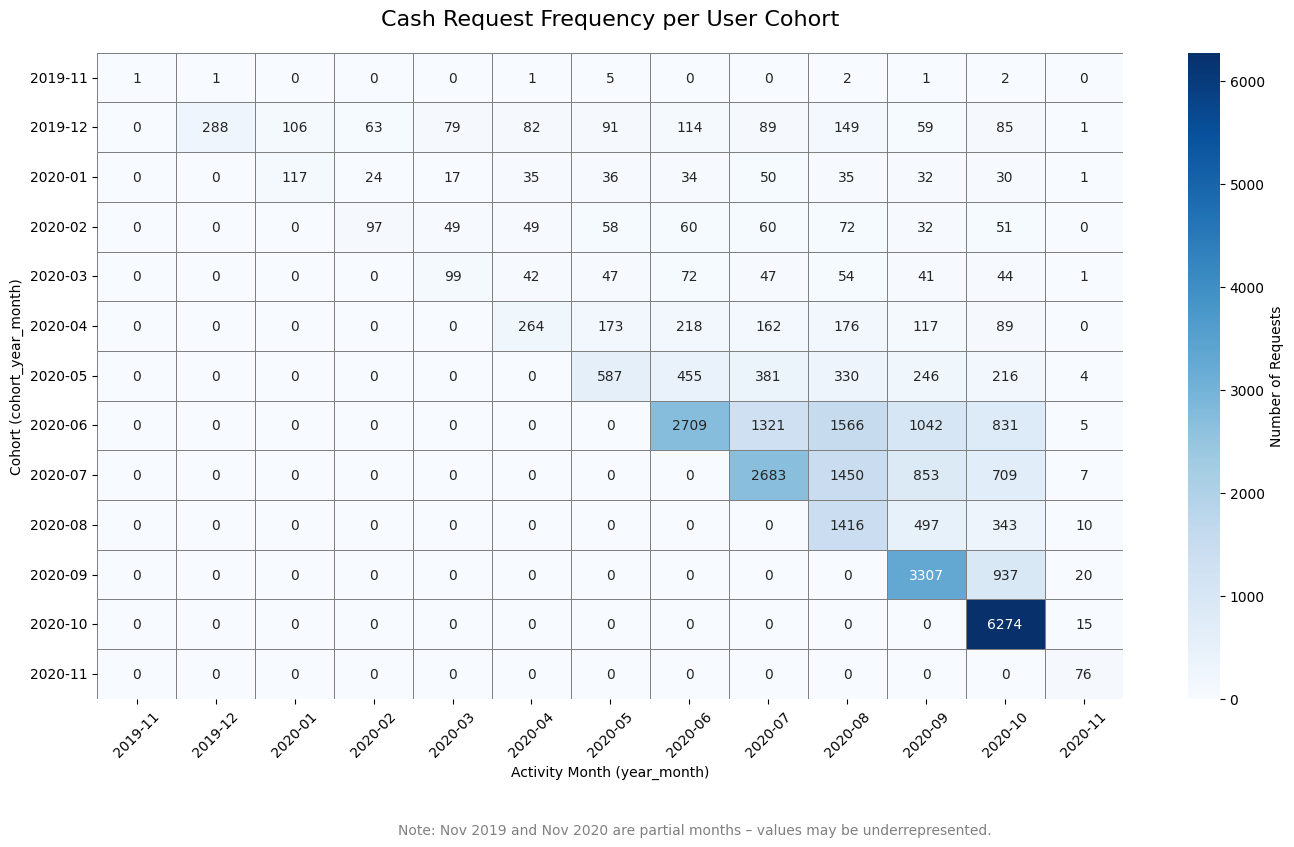

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 📌 First plot of the notebook
PLOT_INDEX = 1
OVERWRITE_PLOTS = True  # Set to False if you don't want to overwrite existing plots

# 📊 Frequency of service usage per cohort
safe_print("📊 Calculating frequency of service usage per cohort...\n")

try:
    # ✅ Group by cohort and usage month
    cohort_usage = (
        merged_cash_fee_cohort
        .groupby(['cohort_year_month', 'year_month'])
        .size()
        .reset_index(name='num_requests')
    )

    # 🔄 Pivot to form cohort usage matrix
    cohort_usage_matrix = cohort_usage.pivot(
        index='cohort_year_month',
        columns='year_month',
        values='num_requests'
    ).fillna(0).astype(int)

    # ✅ Display full matrix
    safe_print("📋 Cohort usage matrix (cash request counts):")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(cohort_usage_matrix)

    # 💾 Save cohort matrix to output folder
    output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_usage_matrix.csv')
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cohort_usage_matrix.to_csv(output_path)
    safe_print(f"\n💾 Cohort usage matrix saved to: {output_path}")

    # 🎨 Plot the cohort usage heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        cohort_usage_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={"label": "Number of Requests"}
    )

    plt.title("Cash Request Frequency per User Cohort", fontsize=16, pad=20)
    plt.xlabel("Activity Month (year_month)")
    plt.ylabel("Cohort (cohort_year_month)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)

    # ✅ Adjust layout before adding footnote
    plt.tight_layout()

    # ✅ Add the footnote (after tight_layout)
    plt.figtext(
        0.5, -0.05,
        "Note: Nov 2019 and Nov 2020 are partial months – values may be underrepresented.",
        wrap=True,
        horizontalalignment='center',
        fontsize=10,
        color='gray'
    )

    # 💾 Save plot with indexed filename (ensure note is saved using bbox_inches='tight')
    plot_filename = f"{PLOT_INDEX:02d}_cohort_usage_heatmap.png"
    plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
    os.makedirs(os.path.dirname(plot_path), exist_ok=True)

    if OVERWRITE_PLOTS or not os.path.exists(plot_path):
        plt.savefig(plot_path, bbox_inches='tight')  # ✅ Save with footnote
        safe_print(f"✅ Cohort usage heatmap saved to: {plot_path}")
    else:
        safe_print(f"⚠️ Skipped saving (already exists): {plot_path}")

    plt.show()

    # 🔁 Increment plot index
    PLOT_INDEX += 1

except Exception as e:
    safe_print("❌ Failed to calculate or plot cohort usage matrix.")
    raise e


### 📊 Interpretation: Frequency of Service Usage by Cohort

The **cohort usage matrix** above shows how frequently users from each cohort requested cash over time:

- **Rows** represent user cohorts based on the month they made their **first cash request** (`cohort_year_month`).
- **Columns** represent the **month of activity** (`year_month`) when the cash requests occurred.
- **Values** represent the total **number of cash requests** made by users from a given cohort in that month.

📌 Key observations:
- Users tend to request cash more frequently in the **first 2–3 months** after joining.
- Some cohorts (e.g., `2020-06`, `2020-07`, `2020-09`) show **high engagement**, with usage peaking quickly and then tapering off.
- The matrix provides a strong foundation for visualizing user behavior trends and retention patterns.

🖼️ A **heatmap** of this matrix was generated to enhance pattern visibility.

✅ Files saved:
- Matrix CSV: `cohort_outputs/data/cohort_usage_matrix.csv`
- Heatmap image: `cohort_outputs/plots/01_cohort_usage_heatmap.png`


---

## 📊 Step 9: Calculate Retention Rate Per Cohort

To assess user engagement over time, we calculate **monthly retention rates** for each cohort.

### 📈 What is Retention Rate?

The retention rate measures the **proportion of users from a given cohort** who made **additional cash requests** in each month after their first.

### 🧬 Calculation Method

- Start with the cohort usage matrix (cash request counts per month).
- Normalize each row by dividing all values by the **first-month count** (i.e., cohort size).
- Resulting values represent the **percentage of retained users** over time.

### ✅ Benefits:
- Tracks user engagement month-over-month.
- Helps identify when usage tends to drop off.
- Supports visualizations like heatmaps or retention curves.

---


In [13]:
# 📊 Calculate retention rate matrix with dtype compatibility fix
safe_print("\n📊 Calculating monthly retention rates per cohort...\n")

try:
    # ✅ Load the cohort usage matrix if not already available
    if 'cohort_usage_matrix' not in globals():
        cohort_matrix_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_usage_matrix.csv')
        cohort_usage_matrix = pd.read_csv(cohort_matrix_path, index_col=0)

    # ✅ Create a new DataFrame for retention as float type
    retention_matrix = cohort_usage_matrix.astype(float)

    # ✅ Normalize each row by its first non-zero value (first month of cohort)
    for idx, row in retention_matrix.iterrows():
        first_value = row[row > 0].iloc[0] if any(row > 0) else None
        if first_value and first_value != 0:
            retention_matrix.loc[idx] = (row / first_value).round(3)
        else:
            retention_matrix.loc[idx] = 0.0

    # ✅ Display the matrix
    safe_print("📋 Retention rate matrix (proportions):")
    display(retention_matrix)

    # 💾 Save to file
    retention_output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_retention_matrix.csv')
    os.makedirs(os.path.dirname(retention_output_path), exist_ok=True)
    retention_matrix.to_csv(retention_output_path)
    safe_print(f"\n💾 Retention matrix saved to: {retention_output_path}")

except Exception as e:
    safe_print("❌ Failed to compute retention matrix.")
    raise e



📊 Calculating monthly retention rates per cohort...

📋 Retention rate matrix (proportions):


year_month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_year_month,,,,,,,,,,,,,
2019-11,1.0,1.0,0.000,0.000,0.000,1.000,5.000,0.000,0.000,2.000,1.000,2.000,0.000
2019-12,0.0,1.0,0.368,0.219,0.274,0.285,0.316,0.396,0.309,0.517,0.205,0.295,0.003
2020-01,0.0,0.0,1.000,0.205,0.145,0.299,0.308,0.291,0.427,0.299,0.274,0.256,0.009
2020-02,0.0,0.0,0.000,1.000,0.505,0.505,0.598,0.619,0.619,0.742,0.330,0.526,0.000
2020-03,0.0,0.0,0.000,0.000,1.000,0.424,0.475,0.727,0.475,0.545,0.414,0.444,0.010
2020-04,0.0,0.0,0.000,0.000,0.000,1.000,0.655,0.826,0.614,0.667,0.443,0.337,0.000
2020-05,0.0,0.0,0.000,0.000,0.000,0.000,1.000,0.775,0.649,0.562,0.419,0.368,0.007
2020-06,0.0,0.0,0.000,0.000,0.000,0.000,0.000,1.000,0.488,0.578,0.385,0.307,0.002
2020-07,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.540,0.318,0.264,0.003



💾 Retention matrix saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_retention_matrix.csv


---

### 📈 Interpretation: Monthly Retention Rate per Cohort

The retention matrix above shows how user engagement changes over time, relative to the month they first used the platform.

- Each row represents a **user cohort** based on their `cohort_year_month`.
- Values show the **proportion of users retained** in each subsequent month (starting from `1.000` in their entry month).
- For example, if a cohort has `0.368` in month 2, that means **36.8%** of the users who joined are still active (made a request) two months later.
- As expected, retention tends to **decrease** over time, with some cohorts maintaining higher engagement longer than others.

This structure is ideal for plotting **cohort retention curves** or heatmaps.

---


---

## 🌡️ Step 10: Visualize Retention – Cohort Heatmap

Now that we’ve calculated monthly retention rates per cohort, we’ll visualize the result using a **heatmap**.

### 📊 Objective:
- Use a color-coded matrix to show how user engagement changes over time
- Identify strong and weak cohorts
- Spot drop-off patterns across cohorts

### 📌 Notes:
- Rows = Cohort of users (based on their first cash request month)
- Columns = Months of activity since signup (`year_month`)
- Cells = % of users from a cohort active in that month

The brighter the color, the **higher the retention** in that month.

---


✅ Retention heatmap saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/02_cohort_retention_heatmap.png


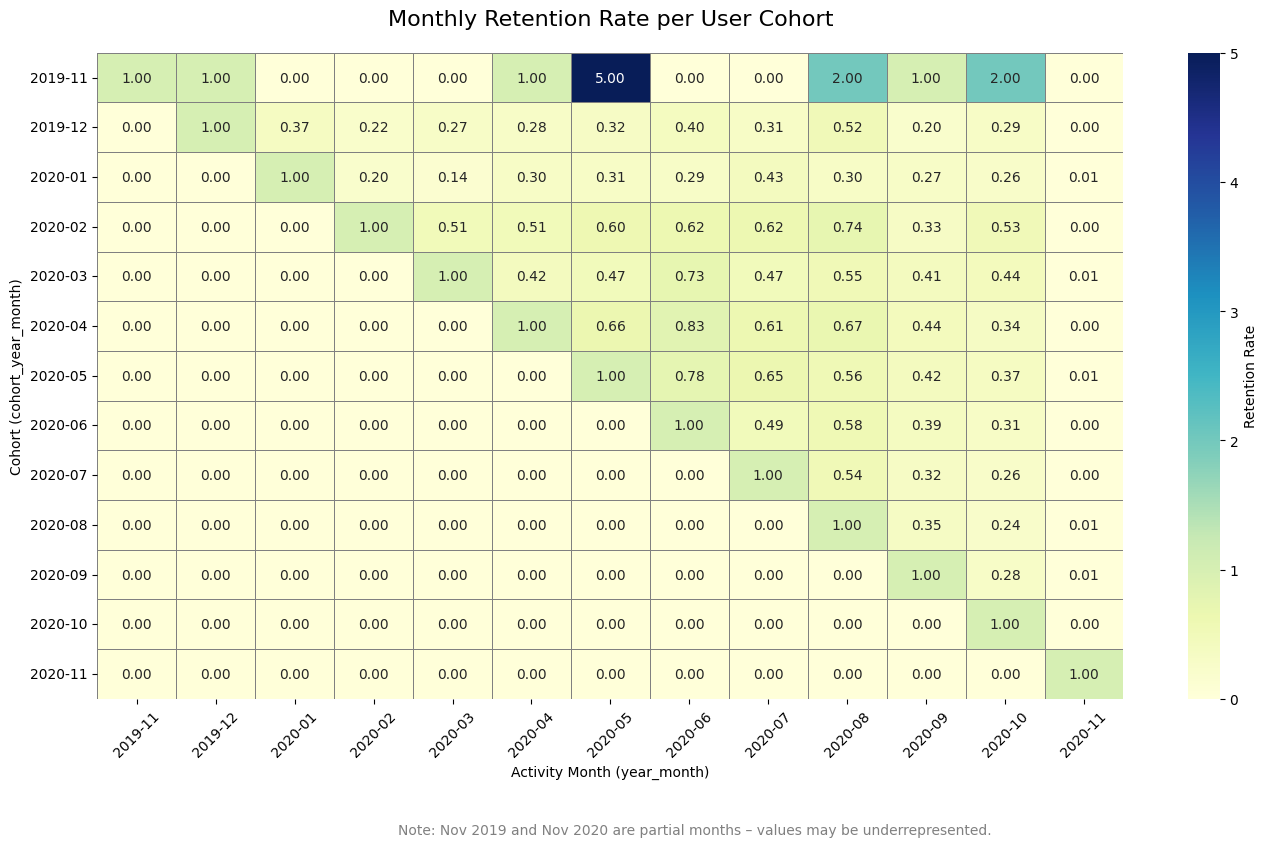

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# 🔧 Plot-saving config
OVERWRITE_PLOTS = True  # Set False to skip re-saving existing images

# 🔄 Load the retention matrix
retention_matrix_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_retention_matrix.csv')
retention_matrix = pd.read_csv(retention_matrix_path, index_col=0)

# 🎨 Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"label": "Retention Rate"}
)

plt.title("Monthly Retention Rate per User Cohort", fontsize=16, pad=20)
plt.xlabel("Activity Month (year_month)")
plt.ylabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.grid(False)

# ✅ Adjust layout BEFORE adding figtext
plt.tight_layout()

# ✅ Add footnote (after tight_layout)
plt.figtext(
    0.5, -0.05,
    "Note: Nov 2019 and Nov 2020 are partial months – values may be underrepresented.",
    wrap=True,
    horizontalalignment='center',
    fontsize=10,
    color='gray'
)

# 💾 Save the heatmap with indexed filename and bbox to include footnote
plot_filename = f"{PLOT_INDEX:02d}_cohort_retention_heatmap.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path, bbox_inches='tight')  # ✅ This includes the note!
    safe_print(f"✅ Retention heatmap saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving (already exists): {plot_path}")

plt.show()

# 🔁 Increment plot index
PLOT_INDEX += 1


---

### 📊 Interpretation: Retention Rate Heatmap (Full Matrix)

The heatmap above visualizes the **monthly retention rate** for each user cohort, where:

- **Rows** represent the `cohort_year_month` — when users made their **first** cash request.
- **Columns** represent the `year_month` — the actual month a user made any cash request.
- Each cell shows the proportion of users from a cohort that returned in a given month.

#### 🔍 Key Observations:
- Retention is highest in the **cohort’s start month** (always 1.00 by definition).
- Some cohorts, especially **2020-06** and **2020-07**, show strong engagement for 2–3 months before declining.
- Later cohorts (like **2020-10** and **2020-11**) display fewer active months due to limited observation time — this results in shorter rows and may underrepresent retention.

⚠️ Note: The first (Nov 2019) and last (Nov 2020) months contain **partial data**, which can distort retention metrics.  
In the next step, we’ll generate a **filtered heatmap** excluding these months for a more accurate trend analysis.

---


### 📉 Step 11: Adjusting for Partial Cohorts

To ensure fair and interpretable comparisons in retention analysis, we **exclude partial-month cohorts and observations** from the visualization and calculations:

- **Nov 2019**: Partial onboarding month (data starts on the 19th)  
- **Nov 2020**: Partial observation month (data ends on the 1st)

These months may **skew retention metrics** due to incomplete exposure windows. To address this, we:

- Recalculate the **retention matrix** without these months  
- Generate a filtered heatmap that excludes these partial periods

> ⚠️ Excluded from both the matrix and heatmap: `2019-11` and `2020-11`


📊 Recalculating retention matrix and generating heatmap (excluding partial cohorts and months)...

📋 Filtered retention matrix (proportions):


year_month,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
cohort_year_month,,,,,,,,,,,
2019-12,1.0,0.368,0.219,0.274,0.285,0.316,0.396,0.309,0.517,0.205,0.295
2020-01,0.0,1.000,0.205,0.145,0.299,0.308,0.291,0.427,0.299,0.274,0.256
2020-02,0.0,0.000,1.000,0.505,0.505,0.598,0.619,0.619,0.742,0.330,0.526
2020-03,0.0,0.000,0.000,1.000,0.424,0.475,0.727,0.475,0.545,0.414,0.444
2020-04,0.0,0.000,0.000,0.000,1.000,0.655,0.826,0.614,0.667,0.443,0.337
2020-05,0.0,0.000,0.000,0.000,0.000,1.000,0.775,0.649,0.562,0.419,0.368
2020-06,0.0,0.000,0.000,0.000,0.000,0.000,1.000,0.488,0.578,0.385,0.307
2020-07,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.540,0.318,0.264
2020-08,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.351,0.242


💾 Filtered retention matrix saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_retention_matrix_filtered.csv
✅ Filtered retention heatmap saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/03_cohort_retention_heatmap_filtered.png


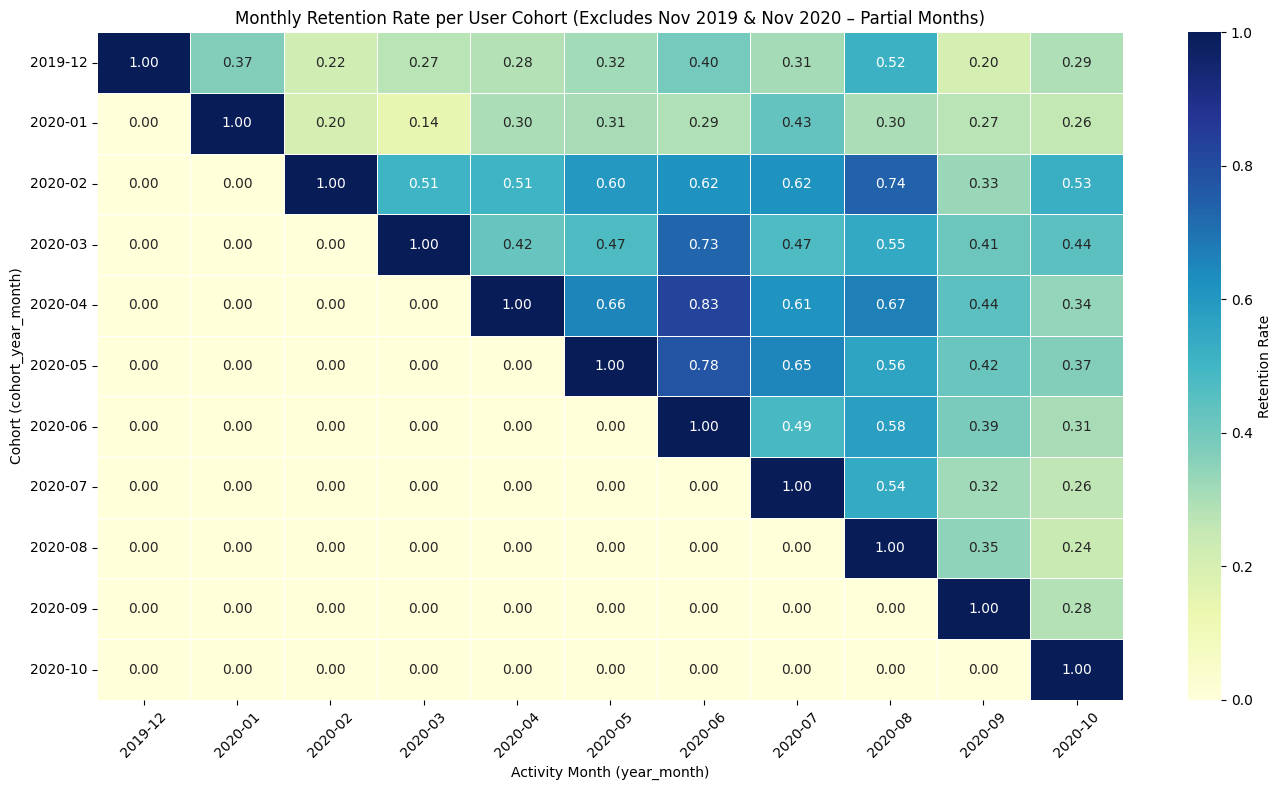

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

safe_print("📊 Recalculating retention matrix and generating heatmap (excluding partial cohorts and months)...\n")

# 🔻 Remove partial cohort rows and observation columns
partial_months = ['2019-11', '2020-11']
filtered_usage = cohort_usage_matrix.drop(index=partial_months, columns=partial_months, errors='ignore')

# 🔁 Normalize each cohort row by its first value
filtered_retention_matrix = filtered_usage.astype(float).copy()

for idx, row in filtered_retention_matrix.iterrows():
    first_value = row.loc[idx] if idx in row else None
    if pd.notna(first_value) and first_value > 0:
        filtered_retention_matrix.loc[idx] = (row / first_value).round(3)
    else:
        filtered_retention_matrix.loc[idx] = 0.0

# ✅ Preview
safe_print("📋 Filtered retention matrix (proportions):")
display(filtered_retention_matrix)

# 💾 Save the filtered matrix
filtered_retention_path = os.path.join(
    project_base_path,
    'cohort_outputs', 'data', 'cohort_retention_matrix_filtered.csv'
)
os.makedirs(os.path.dirname(filtered_retention_path), exist_ok=True)
filtered_retention_matrix.to_csv(filtered_retention_path)
safe_print(f"💾 Filtered retention matrix saved to: {filtered_retention_path}")

# 🎨 Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    filtered_retention_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Retention Rate'}
)

plt.title("Monthly Retention Rate per User Cohort (Excludes Nov 2019 & Nov 2020 – Partial Months)")
plt.xlabel("Activity Month (year_month)")
plt.ylabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# 💾 Save the plot with indexed filename
plot_filename = f"{PLOT_INDEX:02d}_cohort_retention_heatmap_filtered.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if 'OVERWRITE_PLOTS' not in globals():
    OVERWRITE_PLOTS = False

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Filtered retention heatmap saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()

# 🔁 Increment plot index
PLOT_INDEX += 1


### 📊 Interpretation: Retention Heatmap (Filtered for Complete Cohorts and Months)

This heatmap presents **user retention rates over time**, grouped by cohort based on their first cash request month. It uses a **filtered retention matrix** where:

- **Partial cohorts and months** (`2019-11`, `2020-11`) have been removed to improve comparability.
- Retention is **normalized to 1.00** for each cohort’s first active month (month 0).

#### 🔍 Key Observations:
- **Cohorts from Feb to May 2020** exhibit **strong short- and mid-term retention**:
  - **February 2020** maintains retention above **50%** through month 4, peaking at **0.742** in month 5.
  - **April 2020** shows a peak of **0.826** in month 2 and stays above **0.60** through month 4.
- **Earlier cohorts** (e.g., `2019-12`, `2020-01`) decline more rapidly, possibly due to smaller user bases or early-stage platform factors.
- **Later cohorts** (`2020-06` onward) begin with strong usage but show **typical decay**, often falling below **0.40** by month 3 or 4.

✅ This filtered heatmap provides a **clearer view of retention trends** among full cohorts, highlighting periods of effective engagement and areas for retention strategy improvement.


### 📈 Step 13: Retention Curves – Selected Cohorts

To improve clarity and highlight meaningful trends, we visualize **retention curves** only for the **strongest and most representative cohorts**.

- The selected cohorts are: `2020-02`, `2020-03`, `2020-04`, and `2020-05`
- These cohorts showed **strong retention patterns** in the filtered matrix
- The chart allows us to better compare their **engagement trends** over time

> 📊 This focused view avoids the clutter of smaller or incomplete cohorts and supports clear storytelling in presentations.


📈 Plotting retention curves for selected cohorts: 2020-02 to 2020-05...

✅ Selected cohort retention curves saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/04_cohort_retention_curves_selected.png


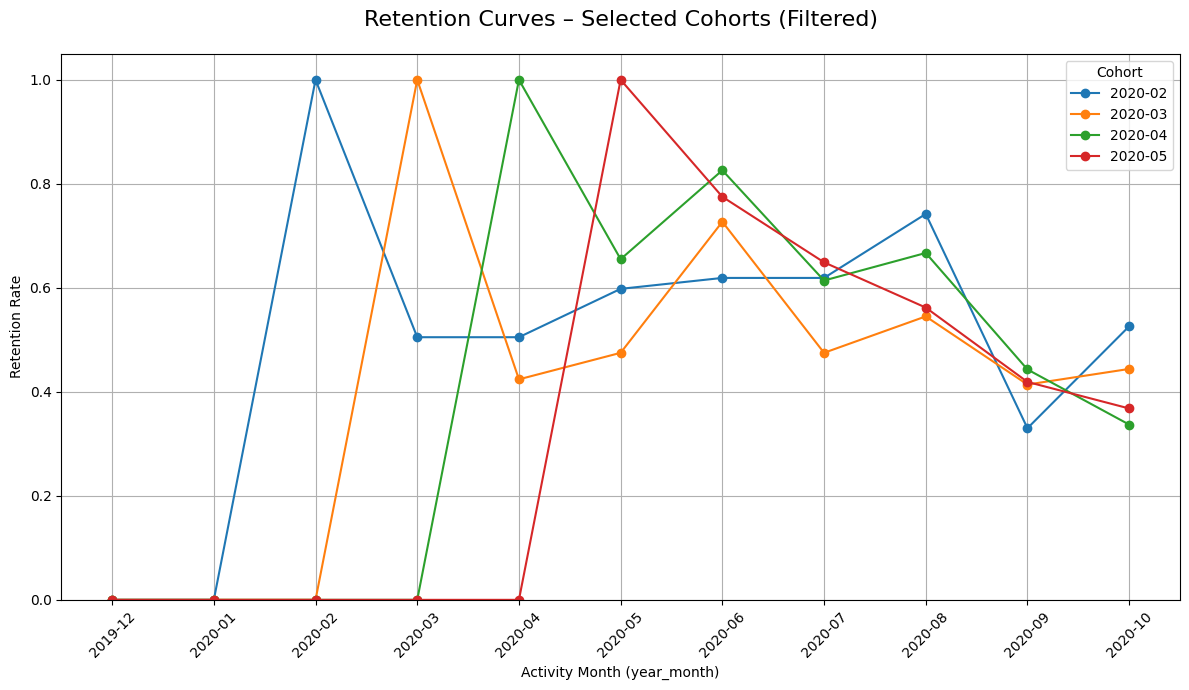

In [16]:
# 📈 Plot retention curves for selected strong cohorts only
import matplotlib.pyplot as plt

safe_print("📈 Plotting retention curves for selected cohorts: 2020-02 to 2020-05...\n")

# 🔄 Load the filtered retention matrix
filtered_retention_path = os.path.join(
    project_base_path,
    'cohort_outputs', 'data', 'cohort_retention_matrix_filtered.csv'
)
filtered_retention_matrix = pd.read_csv(filtered_retention_path, index_col=0)

# ✅ Define selected cohorts to plot
selected_cohorts = ['2020-02', '2020-03', '2020-04', '2020-05']

# 🎨 Plot the curves
plt.figure(figsize=(12, 7))

for cohort_label in selected_cohorts:
    if cohort_label in filtered_retention_matrix.index:
        cohort_values = filtered_retention_matrix.loc[cohort_label]
        plt.plot(cohort_values.index, cohort_values.values, marker='o', label=cohort_label)

plt.title("Retention Curves – Selected Cohorts (Filtered)", fontsize=16, pad=20)
plt.xlabel("Activity Month (year_month)")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(title="Cohort", loc='upper right')
plt.tight_layout()

# 💾 Save with next plot index
plot_filename = f"{PLOT_INDEX:02d}_cohort_retention_curves_selected.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Selected cohort retention curves saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()

# 🔁 Increment plot index
PLOT_INDEX += 1


### 📊 Interpretation: Retention Curves – Selected Cohorts

The line plot above shows **monthly retention rates** for selected high-performing cohorts: `2020-02`, `2020-03`, `2020-04`, and `2020-05`.

These cohorts were chosen based on their **strong engagement trends** observed in earlier visualizations.

#### 🔍 Key Observations:
- All selected cohorts begin at `1.0` in their first active month, as expected.
- **Cohorts `2020-04` and `2020-05`** show **higher mid-term retention**, maintaining over **60% retention** through months 2–4.
- **Cohort `2020-02`** demonstrates a **slower initial ramp-up**, followed by a steady retention pattern over time.
- **Cohort `2020-03`** displays moderate retention but trails behind `2020-04` and `2020-05` after month 3.
- All cohorts show **natural decay** as months progress, though the drop is more gradual in the top-performing groups.

✅ This focused retention curve helps compare user engagement quality and lifecycle trends across the most impactful cohorts.


### ⚠️ Step 14: Incident Rate per Cohort

To evaluate the reliability of Ironhack Payments' service and the effectiveness of user onboarding, we compute the **incident rate** for each cohort.

Incidents include failed payments or reimbursements — situations that trigger **payment recovery flows**. These are flagged in the dataset with the `incident_flag` column, where:

- `incident_flag = 'incident'` → a service issue occurred
- `incident_flag = 'no_incident'` → transaction proceeded normally

#### 🧮 Calculation Formula

For each cohort (`cohort_year_month`), the **incident rate** is calculated as:

$
\text{Incident Rate} = \frac{\text{Number of cash requests with incidents}}{\text{Total number of cash requests}}
$

> 📊 This ratio helps identify whether specific cohorts were more prone to payment failures or operational issues, which could highlight platform instability or user misunderstanding at specific points in time.


In [17]:
# ⚠️ Step 14: Incident Rate per Cohort
safe_print("\n⚠️ Calculating incident rate per cohort...\n")

try:
    # 🔢 Count total and incident requests per cohort
    total_counts = (
        merged_cash_fee_cohort
        .groupby('cohort_year_month')
        .size()
        .rename('total_requests')
    )

    incident_counts = (
        merged_cash_fee_cohort[merged_cash_fee_cohort['incident_flag'] == 'incident']
        .groupby('cohort_year_month')
        .size()
        .rename('incident_requests')
    )

    # 🧮 Combine and calculate rate
    incident_df = pd.concat([total_counts, incident_counts], axis=1).fillna(0)
    incident_df['incident_rate'] = (incident_df['incident_requests'] / incident_df['total_requests']).round(4)

    # ✅ Display
    safe_print("📋 Incident Rate per Cohort:")
    display(incident_df)

    # 💾 Save to CSV
    output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_incident_rate.csv')
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    incident_df.to_csv(output_path)
    safe_print(f"\n💾 Incident rate data saved to: {output_path}")

except Exception as e:
    safe_print("❌ Failed to calculate incident rate.")
    raise e



⚠️ Calculating incident rate per cohort...

📋 Incident Rate per Cohort:


,total_requests,incident_requests,incident_rate
cohort_year_month,,,
2019-11,13,0.0,0.0000
2019-12,1206,165.0,0.1368
2020-01,411,54.0,0.1314
2020-02,528,78.0,0.1477
2020-03,447,78.0,0.1745
2020-04,1199,289.0,0.2410
2020-05,2219,559.0,0.2519
2020-06,7474,1794.0,0.2400
2020-07,5702,1403.0,0.2461



💾 Incident rate data saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_incident_rate.csv


### 📊 Interpretation: Incident Rate per Cohort

The table above displays the **incident rate** — the percentage of cash requests that resulted in a payment incident — for each user cohort based on their month of entry.

#### 🔍 Key Observations:
- **Incident rates range from ~13% to 25%** across most cohorts, reflecting a relatively stable but notable level of operational risk.
- The **lowest incident rates** are seen in early cohorts like `2019-12` (13.7%) and `2020-01` (13.1%), though these cohorts were smaller.
- **Cohorts from `2020-04` to `2020-07`** exhibit the **highest incident rates** (24–25%), which may correlate with rapid user growth, first-time users, or stress on the platform.
- The **peak occurs in `2020-05` (25.2%)**, potentially due to increased demand or onboarding gaps.
- **Incident rates begin to decline** in later cohorts (`2020-10`: 19.7%, `2020-11`: 17.1%), which could indicate improvements in **UX, communication**, or **repayment processes**.
- *Note: `2019-11` and `2020-11` are partial months and may underrepresent actual incident activity.*

✅ This metric helps identify **higher-risk user groups** and supports decisions around **targeted communication, product design, and repayment policy optimization**.


## 📊 Step 15: Visualize Incident Rate per Cohort

To complement the incident rate table, we plot a **bar chart** showing the percentage of requests that resulted in payment incidents for each monthly cohort.

This visualization helps:
- Identify cohorts with elevated operational risk at a glance
- Compare repayment reliability across onboarding periods
- Highlight potential improvement in platform performance over time


📈 Plotting annotated incident rate bar chart per cohort...
✅ Incident rate chart saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/05_cohort_incident_rate.png


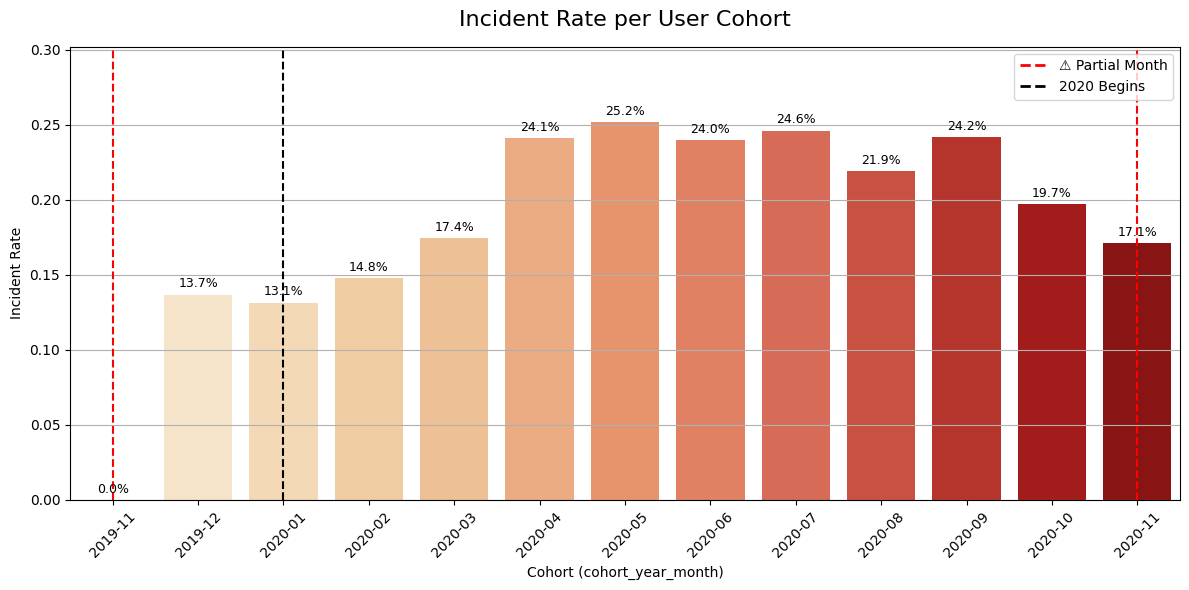

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import os
import pandas as pd

safe_print("📈 Plotting annotated incident rate bar chart per cohort...")

# 🔄 Load incident rate data
incident_rate_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_incident_rate.csv')
incident_df = pd.read_csv(incident_rate_path, index_col=0)
incident_df.index = incident_df.index.astype(str)

# 📊 Plot config
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x=incident_df.index,
    y=incident_df['incident_rate'],
    hue=incident_df.index,
    palette="OrRd",
    legend=False
)

# 🧾 Annotate each bar with its incident rate
for index, bar in enumerate(barplot.patches):
    height = bar.get_height()
    label = f"{height:.1%}"  # e.g., 25.2%
    barplot.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

plt.title("Incident Rate per User Cohort", fontsize=16, pad=15)
plt.ylabel("Incident Rate")
plt.xlabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.ylim(0, incident_df['incident_rate'].max() + 0.05)
plt.grid(axis='y')

# 🔻 Mark partial months
partial_months = ['2019-11', '2020-11']
for partial_month in partial_months:
    if partial_month in incident_df.index:
        idx = list(incident_df.index).index(partial_month)
        plt.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)

# 🔻 Mark start of 2020
start_2020 = '2020-01'
if start_2020 in incident_df.index:
    idx = list(incident_df.index).index(start_2020)
    plt.axvline(x=idx, color='black', linestyle='--', linewidth=1.5)

# 🧾 Custom legend
custom_lines = [
    Line2D([0], [0], color='red', linestyle='--', lw=2),
    Line2D([0], [0], color='black', linestyle='--', lw=2)
]
plt.legend(
    custom_lines,
    ['⚠️ Partial Month', '2020 Begins'],
    loc='upper right'
)

plt.tight_layout()

# 💾 Save plot
plot_filename = f"{PLOT_INDEX:02d}_cohort_incident_rate.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Incident rate chart saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()

# 🔁 Increment plot index
PLOT_INDEX += 1


### 📉 Interpretation: Incident Rate per Cohort (Bar Chart)

The bar chart above illustrates the **incident rate** per monthly user cohort — that is, the **percentage of users within each cohort who encountered a payment incident**.

#### 🔍 Key Observations:
- Incident rates **increase steadily** from early 2020 cohorts (`2020-01`: 13.1%) through the **peak in `2020-05` (25.2%)**.
- **Cohorts `2020-04` to `2020-07`** maintain high levels of incidents, suggesting challenges tied to platform scaling or user repayment behavior.
- A **notable decline begins in `2020-08` and continues into `2020-10`**, potentially signaling **platform maturity**, **enhanced repayment features**, or **better onboarding**.
- The **lowest rates** are observed in small early cohorts like `2019-12` and `2020-01`, indicating better repayment compliance among early adopters.
- *Red dashed lines* mark **partial months** (`2019-11`, `2020-11`), which are **not fully comparable** due to limited data.
- The *black dashed line* highlights the **start of 2020**, aligning with product launch scaling.

✅ Visualizing this data enables **risk profiling by user segment** and helps focus on cohorts that could benefit from **educational nudges, follow-up strategies**, or **policy adjustments**.


---
## 💰 Step 16: Revenue Generated per Cohort

In this step, I calculate the **total revenue** generated by each user cohort based on **fees that were successfully charged**.

Revenue is a critical metric to evaluate **financial performance**, and analyzing it by cohort helps us:
- 📈 Identify which user groups bring in the most value
- 📊 Evaluate long-term monetization patterns
- 🚀 Track business growth over time

This metric helps answer:
- Which cohorts are the most financially valuable?
- How does monetization evolve across cohorts?
- What is the long-term revenue contribution of each user group?

💸 Revenue comes from fees classified as:
- `instant_payment`: charged for immediate fund transfers
- `postpone`: charged when users delay their reimbursement date
- `incident`: charged when a direct debit attempt fails

Only fees with `fee_status = accepted` are included to ensure we capture **actual income**, not just potential charges.

---

📌 **Formula Used**:
> **Cohort Revenue** = Sum of `total_amount` where `fee_status == "accepted"`

We group by the `cohort_year_month` of each user and sum the corresponding accepted fees.

---


In [19]:
import pandas as pd
import os

safe_print("💰 Calculating revenue per cohort...")

# 🔄 Load merged dataset
merged_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'merged_cash_fee_cohort.csv')
merged_df = pd.read_csv(merged_path)

# 💰 Filter for accepted fees only
accepted_fees = merged_df[merged_df['fee_status'] == 'accepted']

# 🧮 Group by cohort and sum total_amount
cohort_revenue = (
    accepted_fees.groupby('cohort_year_month')['total_amount']
    .sum()
    .reset_index(name='cohort_revenue')
    .sort_values(by='cohort_year_month')
)

# ✅ Display table
safe_print("📋 Cohort Revenue:")
display(cohort_revenue)

# 💾 Save to file
revenue_output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_revenue.csv')
os.makedirs(os.path.dirname(revenue_output_path), exist_ok=True)
cohort_revenue.to_csv(revenue_output_path, index=False)
safe_print(f"💾 Revenue data saved to: {revenue_output_path}")

# 📝 Partial month note
safe_print("\n*️⃣ Note: '2019-11' and '2020-11' are partial months.\n- Nov 2019: Data starts on the 19th.\n- Nov 2020: Data ends on the 1st.\nRevenue from these cohorts is expected to be lower and should not be compared directly.")


💰 Calculating revenue per cohort...
📋 Cohort Revenue:


,cohort_year_month,cohort_revenue
0,2019-11,30.0
1,2019-12,1130.0
2,2020-01,460.0
3,2020-02,635.0
4,2020-03,645.0
5,2020-04,1585.0
6,2020-05,3930.0
7,2020-06,14365.0
8,2020-07,11135.0
9,2020-08,5045.0


💾 Revenue data saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_revenue.csv

*️⃣ Note: '2019-11' and '2020-11' are partial months.
- Nov 2019: Data starts on the 19th.
- Nov 2020: Data ends on the 1st.
Revenue from these cohorts is expected to be lower and should not be compared directly.


### 💰 Interpretation: Revenue per Cohort

The table above shows the **total revenue** generated by each user cohort, calculated from successfully **accepted fees** linked to cash requests.

#### 🔍 Key Observations:
- Revenue starts modestly with early cohorts like `2019-12` (€1,130) and `2020-01` (€460).
- **Mid-2020 cohorts** exhibit significant growth:
  - `2020-06`: €14,365  
  - `2020-07`: €11,135  
  - `2020-09`: €11,400
- The **highest cohort revenue** is observed in `2020-10` (€23,530), indicating a period of strong platform performance and monetization.
- **Partial months** such as `2019-11` and `2020-11` show artificially low revenue:
  - `2019-11`: €30  
  - `2020-11`: €320  
  These cohorts are only partially observed and should be interpreted with caution.

✅ This analysis reveals how monetization evolves over time, highlights high-value cohorts, and provides insight into Ironhack Payments’ financial growth patterns.


### 📊 Step 17: Revenue per Cohort (Bar Chart)

The bar chart below visualizes the **total revenue** generated by each user cohort.

#### 🔍 Key Insights:
- Revenue increased significantly starting with the `2020-04` cohort, peaking with `2020-10` at over **€23,500**.
- **June (`2020-06`) and July (`2020-07`) 2020** stand out not only individually — with **€14,365** and **€11,135** respectively — but also as a combined contribution exceeding **€25,000**.
- These two cohorts represent a **sustained high-activity phase**, aligning with elevated user engagement and strong short-term monetization.
- **Cohorts such as `2020-09`** also demonstrate solid revenue, reflecting consistent platform performance.
- **Early cohorts** (`2019-12`, `2020-01`) yield lower revenue, consistent with smaller user bases and early-stage adoption.
- **Partial-month cohorts** (`2019-11`, `2020-11`) show limited revenue due to incomplete data and should be interpreted cautiously.

✅ This chart highlights how platform monetization scaled with both **user growth** and **usage intensity**, especially during the mid-2020 surge.


📈 Plotting revenue per cohort...
✅ Revenue chart saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/06_cohort_revenue_bar.png


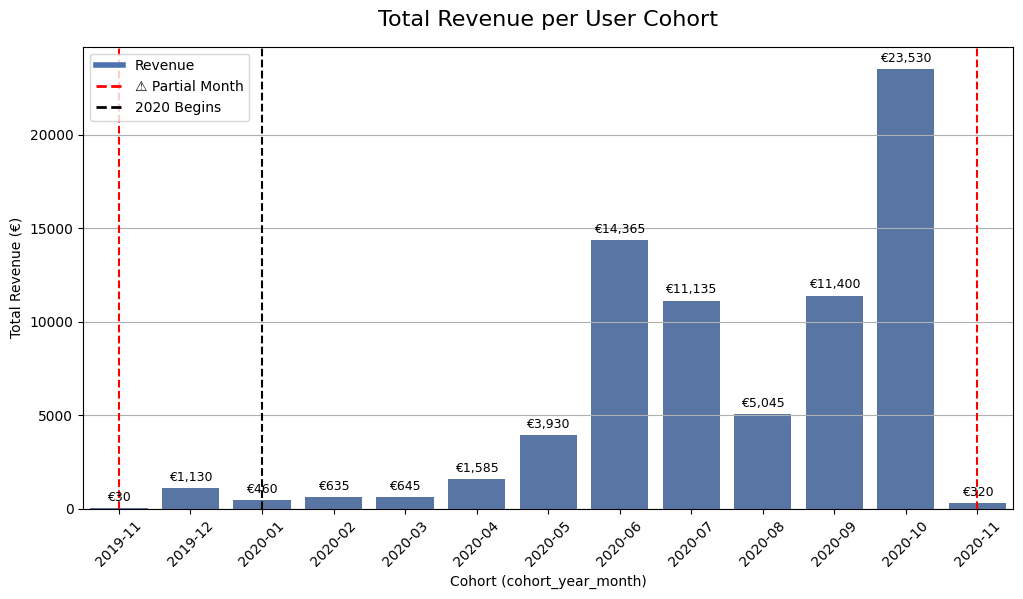

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from matplotlib.lines import Line2D

safe_print("📈 Plotting revenue per cohort...")

# 🔄 Load revenue data
revenue_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_revenue.csv')
revenue_df = pd.read_csv(revenue_path)

# 📊 Plot setup
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=revenue_df,
    x='cohort_year_month',
    y='cohort_revenue',
    color='#4c72b0'
)

# 💬 Annotate each bar with its value
for bar in barplot.patches:
    height = bar.get_height()
    label = f"€{int(height):,}"  # e.g., €11,135
    barplot.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

# ⚠️ Mark partial months
partial_months = ['2019-11', '2020-11']
for partial in partial_months:
    if partial in revenue_df['cohort_year_month'].values:
        idx = revenue_df[revenue_df['cohort_year_month'] == partial].index[0]
        plt.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)

# 📌 Mark beginning of 2020
if '2020-01' in revenue_df['cohort_year_month'].values:
    jan_idx = revenue_df[revenue_df['cohort_year_month'] == '2020-01'].index[0]
    plt.axvline(x=jan_idx, color='black', linestyle='--', linewidth=1.5)

# 🖼️ Titles and labels
plt.title("Total Revenue per User Cohort", fontsize=16, pad=15)
plt.ylabel("Total Revenue (€)")
plt.xlabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.grid(axis='y')

# 🧭 Custom legend
legend_lines = [
    Line2D([0], [0], color='#4c72b0', lw=4),
    Line2D([0], [0], color='red', linestyle='--', lw=2),
    Line2D([0], [0], color='black', linestyle='--', lw=2),
]
plt.legend(legend_lines, ['Revenue', '⚠️ Partial Month', '2020 Begins'], loc='upper left')

# 💾 Save plot
plot_filename = f"{PLOT_INDEX:02d}_cohort_revenue_bar.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Revenue chart saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()

# 🔁 Increment plot index
PLOT_INDEX += 1


### 📈 Step 18: Cumulative Revenue Over Time by Cohort

In this step, we examine the **evolution of total revenue** generated across all user cohorts.

You will first see a **cumulative revenue table**, which displays how revenue has progressively accumulated month by month for each cohort.  
This is followed by a **line chart** that visualizes the platform’s overall monetization growth over time.

This analysis helps:
- Understand the **long-term financial contribution** of each user cohort  
- Track **revenue scaling patterns** as the user base grows  
- Evaluate the **impact of key operational periods**

> ⚠️ *Note: Partial-month cohorts (`2019-11`, `2020-11`) are included for completeness but should be interpreted cautiously due to limited data coverage.*


📈 Calculating cumulative revenue over time...
💾 Cumulative revenue table saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_cumulative_revenue.csv
📋 Cumulative Revenue by Month:


,cohort_year_month,cohort_revenue,cumulative_revenue
0,2019-11,30.0,30.0
1,2019-12,1130.0,1160.0
2,2020-01,460.0,1620.0
3,2020-02,635.0,2255.0
4,2020-03,645.0,2900.0
5,2020-04,1585.0,4485.0
6,2020-05,3930.0,8415.0
7,2020-06,14365.0,22780.0
8,2020-07,11135.0,33915.0
9,2020-08,5045.0,38960.0



*️⃣ Note: `2019-11` and `2020-11` are partial months and should be interpreted cautiously.

✅ Cumulative revenue chart saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/07_cohort_revenue_cumulative_line.png


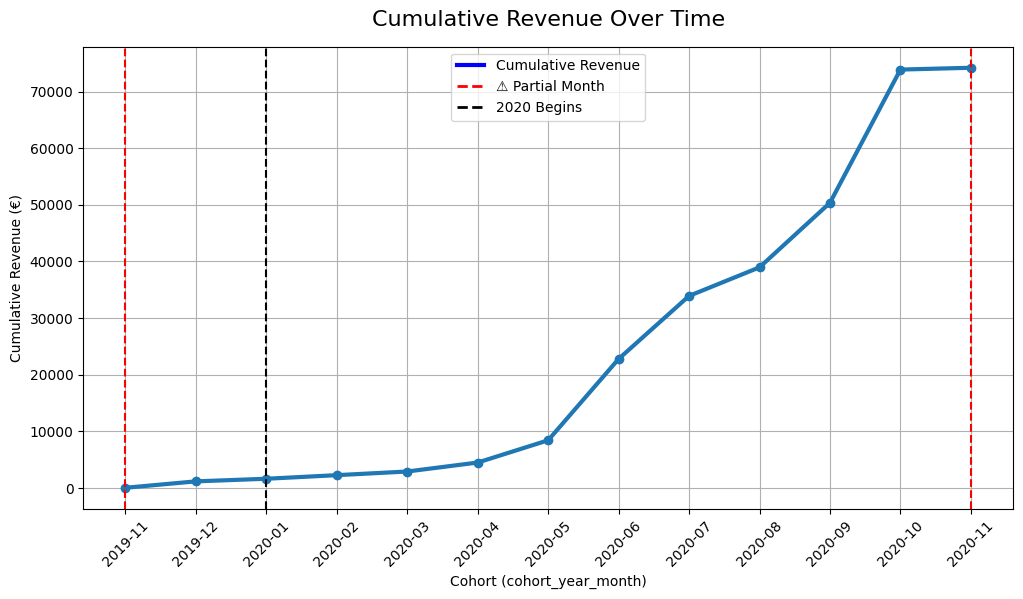

In [21]:
safe_print("📈 Calculating cumulative revenue over time...")

# 🔄 Load cohort revenue
revenue_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_revenue.csv')
revenue_df = pd.read_csv(revenue_path)

# 📊 Sort and compute cumulative sum
revenue_df = revenue_df.sort_values("cohort_year_month")
revenue_df["cumulative_revenue"] = revenue_df["cohort_revenue"].cumsum()

# 💾 Save the cumulative revenue table
cumulative_table_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_cumulative_revenue.csv')
os.makedirs(os.path.dirname(cumulative_table_path), exist_ok=True)
revenue_df.to_csv(cumulative_table_path, index=False)
safe_print(f"💾 Cumulative revenue table saved to: {cumulative_table_path}")

# 🖥️ Show table before plot
safe_print("📋 Cumulative Revenue by Month:")
display(revenue_df[["cohort_year_month", "cohort_revenue", "cumulative_revenue"]])

# ➕ Note about partial months
safe_print("\n*️⃣ Note: `2019-11` and `2020-11` are partial months and should be interpreted cautiously.\n")

# 📈 Plot cumulative revenue line chart
plt.figure(figsize=(12, 6))
plt.plot(revenue_df["cohort_year_month"], revenue_df["cumulative_revenue"], marker='o', linewidth=3)
plt.title("Cumulative Revenue Over Time", fontsize=16, pad=15)
plt.xlabel("Cohort (cohort_year_month)")
plt.ylabel("Cumulative Revenue (€)")
plt.xticks(rotation=45)
plt.grid(True)

# 🔻 Add vertical dashed lines for partial months and Jan 2020
partial_months = ['2019-11', '2020-11']
for month in partial_months:
    if month in revenue_df["cohort_year_month"].values:
        idx = revenue_df[revenue_df["cohort_year_month"] == month].index[0]
        plt.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)

# 🎯 Mark where 2020 starts
if "2020-01" in revenue_df["cohort_year_month"].values:
    jan_idx = revenue_df[revenue_df["cohort_year_month"] == "2020-01"].index[0]
    plt.axvline(x=jan_idx, color='black', linestyle='--', linewidth=1.5)

# 📘 Legend
custom_lines = [
    plt.Line2D([0], [0], color='blue', lw=3),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=2),
    plt.Line2D([0], [0], color='black', linestyle='--', lw=2)
]
plt.legend(custom_lines, ['Cumulative Revenue', '⚠️ Partial Month', '2020 Begins'])

# 💾 Save plot
plot_filename = f"{PLOT_INDEX:02d}_cohort_revenue_cumulative_line.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ Cumulative revenue chart saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()
PLOT_INDEX += 1


### 📊 Interpretation: Cumulative Revenue Growth

The chart and table above show the **total accumulated revenue** from all user cohorts over time, offering a clear picture of Ironhack Payments’ financial growth.

#### 🔍 Key Observations:
- **Steady revenue growth** is visible through early 2020, followed by a **sharp acceleration** starting in `2020-06`.
- The **strongest contributions** came from the `2020-06`, `2020-07`, `2020-09`, and `2020-10` cohorts — each adding significantly to cumulative revenue.
- Revenue continued to build **month over month**, reaching a total of **€74,210** by the end of `2020-11`.
- Cohorts launched during peak periods not only attracted more users but also **converted more fees**, indicating effective monetization and retention strategies.

> ⚠️ *Caution is advised when interpreting revenue from `2019-11` and `2020-11`*, as these represent **partial months** with limited activity and user data.

✅ This cumulative view is essential for understanding **platform scalability**, **cohort monetization lifecycle**, and **overall business performance** over time.


---
## 💸 Step 19: Additional Metric - ARPU (Average Revenue Per User) per Cohort

To assess the **financial value of each user cohort**, we calculate the **Average Revenue Per User (ARPU)**.

### 📌 What is ARPU?
ARPU represents the **average revenue generated per user** within a given cohort. It helps quantify user value over time and supports decisions related to customer acquisition cost (CAC), lifetime value (LTV), and product-market fit.

### 🧮 Calculation Formula:
$
\text{ARPU} = \frac{\text{Total Cohort Revenue}}{\text{Number of Unique Users in the Cohort}}
$

### 🔢 Data Sources:
- `cohort_revenue.csv`: contains total revenue per cohort (from accepted fees)
- `user_first_request.csv`: contains user-to-cohort mapping (used to count users per cohort)

### 📈 Output:
- A table with each cohort's revenue, user count, and ARPU
- A bar chart visualizing ARPU across cohorts

> ⚠️ *Partial cohorts (e.g., `2019-11`, `2020-11`) may show lower ARPU due to limited observation windows.*
---


💸 Calculating ARPU (Average Revenue Per User) per cohort...
📋 ARPU per Cohort:


,cohort_year_month,cohort_revenue,user_count,arpu
0,2019-11,30.0,1,30.00
1,2019-12,1130.0,254,4.45
2,2020-01,460.0,106,4.34
3,2020-02,635.0,90,7.06
4,2020-03,645.0,86,7.50
5,2020-04,1585.0,246,6.44
6,2020-05,3930.0,432,9.10
7,2020-06,14365.0,1540,9.33
8,2020-07,11135.0,1482,7.51
9,2020-08,5045.0,728,6.93



*️⃣ Note: `2019-11` and `2020-11` are partial months and should be interpreted cautiously.

💾 ARPU data saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_arpu.csv
✅ ARPU chart saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/08_cohort_arpu_bar.png


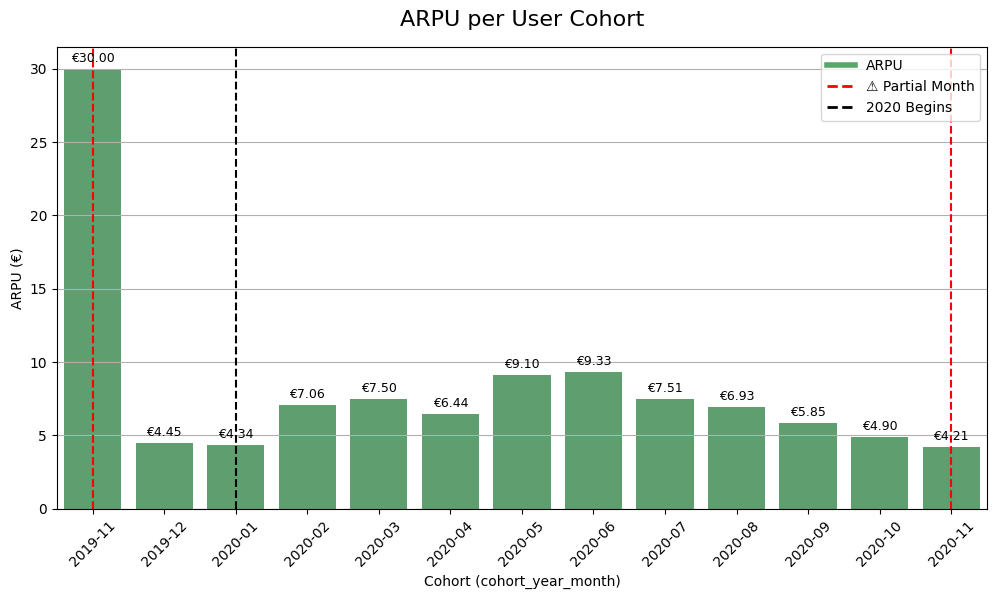

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

# 💸 ARPU (Average Revenue Per User) per Cohort
safe_print("💸 Calculating ARPU (Average Revenue Per User) per cohort...")

# 📂 Define paths
revenue_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_revenue.csv')
user_map_path = os.path.join(project_base_path, 'eda_outputs', 'data', 'user_first_request.csv')

# 📥 Load revenue and user-cohort mapping
cohort_revenue = pd.read_csv(revenue_path)
user_first_request = pd.read_csv(user_map_path)

# 👥 Count users per cohort
cohort_user_counts = (
    user_first_request.groupby('cohort_year_month')
    .size()
    .reset_index(name='user_count')
)

# 🔗 Merge revenue and user counts
arpu_df = pd.merge(cohort_revenue, cohort_user_counts, on='cohort_year_month', how='left')

# 🧮 Calculate ARPU
arpu_df['arpu'] = (arpu_df['cohort_revenue'] / arpu_df['user_count']).round(2)

# 📋 Preview table
safe_print("📋 ARPU per Cohort:")
display(arpu_df)

# ➕ Note about partial months
safe_print("\n*️⃣ Note: `2019-11` and `2020-11` are partial months and should be interpreted cautiously.\n")

# 💾 Save to CSV
arpu_output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_arpu.csv')
os.makedirs(os.path.dirname(arpu_output_path), exist_ok=True)
arpu_df.to_csv(arpu_output_path, index=False)
safe_print(f"💾 ARPU data saved to: {arpu_output_path}")

# 📊 Bar plot of ARPU
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=arpu_df, x='cohort_year_month', y='arpu', color='#55a868')

# 💬 Add ARPU value labels above bars
for bar in barplot.patches:
    height = bar.get_height()
    label = f"€{height:.2f}"
    barplot.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

# 📌 Titles and axes
plt.title("ARPU per User Cohort", fontsize=16, pad=15)
plt.ylabel("ARPU (€)")
plt.xlabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.grid(axis='y')

# 🔻 Mark partial months
partial_months = ['2019-11', '2020-11']
for partial in partial_months:
    if partial in arpu_df['cohort_year_month'].values:
        idx = arpu_df[arpu_df['cohort_year_month'] == partial].index[0]
        plt.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)

# ⚫ Add 2020 start line
if '2020-01' in arpu_df['cohort_year_month'].values:
    idx = arpu_df[arpu_df['cohort_year_month'] == '2020-01'].index[0]
    plt.axvline(x=idx, color='black', linestyle='--', linewidth=1.5)

# 🧾 Custom legend
custom_lines = [
    plt.Line2D([0], [0], color='#55a868', lw=4),
    plt.Line2D([0], [0], color='red', linestyle='--', lw=2),
    plt.Line2D([0], [0], color='black', linestyle='--', lw=2)
]
plt.legend(custom_lines, ['ARPU', '⚠️ Partial Month', '2020 Begins'], loc='upper right')

# 💾 Save plot
plot_filename = f"{PLOT_INDEX:02d}_cohort_arpu_bar.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ ARPU chart saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()
PLOT_INDEX += 1


### 📊 Interpretation: ARPU (Average Revenue Per User) per Cohort

The chart and table above show the **ARPU** for each monthly user cohort — measuring how much revenue was generated **on average per user**.

> 💡 **ARPU** is a core **monetization metric** indicating the average revenue Ironhack Payments earned from each user in a cohort.  
> 📈 It reflects how well user activity is being converted into income via service fees.

#### 🔍 Key Observations:
- The highest ARPU appears in **2019-11 (€30.00)**, but it reflects just **one user**, making it **statistically insignificant**.
- **Mid-2020 cohorts** show the **strongest monetization performance**:
  - `2020-06`: €9.33  
  - `2020-05`: €9.10  
  - `2020-07`: €7.51  
  These values combine **strong revenue** with **large user bases**, making them meaningful.
- **Early cohorts** (`2019-12` to `2020-03`) have lower ARPU, ranging from **€4.34 to €7.50**, consistent with their modest revenue and user counts.
- **Later cohorts** show declining ARPU:
  - `2020-10`: €4.90, possibly due to low retention or rapid scaling challenges  
  - `2020-11`: €4.21, likely underreported due to **partial data**

#### ⭐ April–August 2020: A Monetization "Sweet Spot"
Cohorts from **April to August 2020** achieved a strong balance between:
- **High ARPU** (from €6.44 to €7.51)
- **Robust user growth** (hundreds to over 1,400 users per cohort)

This period reflects **effective monetization** — with sustained engagement and consistent revenue generation per user.

#### 📌 Why ARPU Matters
ARPU helps Ironhack Payments:
- Assess **cohort-level revenue efficiency**
- Compare user value vs. **Customer Acquisition Cost (CAC)**
- Identify **high-value segments** for retention, upselling, or targeted campaigns

> ⚠️ *Use caution when interpreting ARPU from partial or very recent cohorts (`2019-11`, `2020-11`) due to incomplete lifecycle visibility.*


### 💡 Step 20: Additional Metric – Customer Lifetime Value (CLV)

**Customer Lifetime Value (CLV)** estimates the **total revenue an average user is expected to generate** during their lifecycle with Ironhack Payments.

It is calculated using:

> **CLV = ARPU × Average Retention Duration (in months)**

- **ARPU** (Average Revenue Per User) comes from dividing total cohort revenue by its user count.
- **Average Retention Duration** is derived by converting the retention matrix into binary form (1 = active, 0 = inactive) and summing the number of active months for each cohort.

This metric helps Ironhack Payments assess the **long-term revenue potential** of different user segments, guiding both acquisition and retention strategies.

> ⚠️ *Partial or very recent cohorts (e.g., `2019-11`, `2020-11`) are excluded from the CLV chart to ensure consistent and interpretable insights.*


💡 Calculating CLV (Customer Lifetime Value)...
💾 CLV data saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/data/cohort_clv.csv
📋 CLV per Cohort:


,cohort_year_month,cohort_revenue,user_count,arpu,avg_retention_months,clv
1,2019-12,1130.0,254,4.45,11.0,48.95
2,2020-01,460.0,106,4.34,10.0,43.40
3,2020-02,635.0,90,7.06,9.0,63.54
4,2020-03,645.0,86,7.50,8.0,60.00
5,2020-04,1585.0,246,6.44,7.0,45.08
6,2020-05,3930.0,432,9.10,6.0,54.60
7,2020-06,14365.0,1540,9.33,5.0,46.65
8,2020-07,11135.0,1482,7.51,4.0,30.04
9,2020-08,5045.0,728,6.93,3.0,20.79
10,2020-09,11400.0,1950,5.85,2.0,11.70


✅ CLV chart saved to: /content/drive/MyDrive/Colab Notebooks/Ironhack/Week 2/Week 2 - Day 4/project-1-ironhack-payments-2-en/cohort_outputs/plots/09_cohort_clv_bar.png


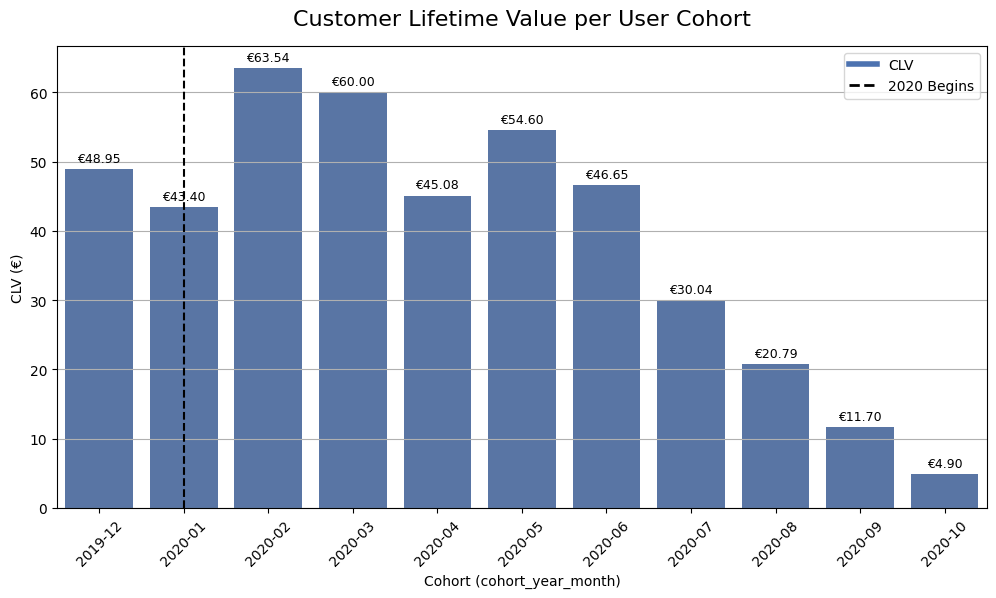

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import os
import pandas as pd

# 📌 Calculate Customer Lifetime Value (CLV)
safe_print("💡 Calculating CLV (Customer Lifetime Value)...")

# 📥 Load ARPU and filtered retention matrix
arpu_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_arpu.csv')
retention_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_retention_matrix_filtered.csv')

arpu_df = pd.read_csv(arpu_path)
retention_df = pd.read_csv(retention_path, index_col=0)

# 🔢 Calculate average retention duration: count non-zero months per cohort
retention_binary = retention_df.gt(0).astype(int)
avg_retention_months = retention_binary.sum(axis=1).rename("avg_retention_months").reset_index()

# 🔗 Merge with ARPU
clv_df = arpu_df.merge(avg_retention_months, on='cohort_year_month', how='left')
clv_df['clv'] = (clv_df['arpu'] * clv_df['avg_retention_months']).round(2)

# 🧹 Exclude partial cohorts from both table and plot
partial_months = ['2019-11', '2020-11']
clv_df = clv_df[~clv_df['cohort_year_month'].isin(partial_months)]

# 💾 Save CLV table
clv_output_path = os.path.join(project_base_path, 'cohort_outputs', 'data', 'cohort_clv.csv')
clv_df.to_csv(clv_output_path, index=False)
safe_print(f"💾 CLV data saved to: {clv_output_path}")

# 📋 Preview table before plotting
safe_print("📋 CLV per Cohort:")
display(clv_df)

# 📊 Plot CLV per cohort
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=clv_df, x='cohort_year_month', y='clv', color='#4c72b0')

# 💬 Add CLV labels above bars
for bar in barplot.patches:
    height = bar.get_height()
    label = f"€{height:.2f}"
    barplot.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 3),
        textcoords='offset points'
    )

# 📌 Titles and axes
plt.title("Customer Lifetime Value per User Cohort", fontsize=16, pad=15)
plt.ylabel("CLV (€)")
plt.xlabel("Cohort (cohort_year_month)")
plt.xticks(rotation=45)
plt.grid(axis='y')

# 🔻 Mark start of 2020 (centered on '2020-01')
if '2020-01' in clv_df['cohort_year_month'].values:
    x_labels = list(clv_df['cohort_year_month'])
    x_pos = x_labels.index('2020-01')
    plt.axvline(x=x_pos, color='black', linestyle='--', linewidth=1.5)

# 🧾 Custom legend
custom_lines = [
    Line2D([0], [0], color='#4c72b0', lw=4),
    Line2D([0], [0], color='black', linestyle='--', lw=2),
]
plt.legend(custom_lines, ['CLV', '2020 Begins'], loc='upper right')

# 💾 Save plot
plot_filename = f"{PLOT_INDEX:02d}_cohort_clv_bar.png"
plot_path = os.path.join(project_base_path, 'cohort_outputs', 'plots', plot_filename)
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

if OVERWRITE_PLOTS or not os.path.exists(plot_path):
    plt.savefig(plot_path)
    safe_print(f"✅ CLV chart saved to: {plot_path}")
else:
    safe_print(f"⚠️ Skipped saving – file already exists: {plot_path}")

plt.show()
PLOT_INDEX += 1


### 📊 Interpretation: Customer Lifetime Value (CLV) per Cohort

The bar chart above displays the **Customer Lifetime Value (CLV)** for each cohort, calculated using:

> **CLV = ARPU × Average Retention Duration**

This metric estimates the **total revenue** a typical user is expected to generate over their lifecycle on the platform.

#### 🔍 Key Observations:
- The **highest CLV** values appear in **early-to-mid 2020 cohorts**:
  - `2020-02`: €63.54  
  - `2020-03`: €60.00  
  - `2020-05`: €54.60  
  These cohorts combined **strong ARPU** with **longer average retention**, making them **high-value user groups**.
- **2020-06 and 2020-07** also show solid revenue per user, but retention dropped faster, reducing their total CLV.
- **Later cohorts** (`2020-09` to `2020-10`) show low CLV, mainly due to **shorter follow-up periods**, not necessarily poor user quality.

#### 💡 Strategic Insight:
CLV is essential for guiding business decisions, helping Ironhack Payments:
- Target and retain cohorts with the **greatest long-term value**
- Align marketing and onboarding efforts with **high-CLV user profiles**
- Estimate revenue contributions over time and prioritize **customer lifecycle management**

> ⚠️ *Note: CLV values are based on current retention and will evolve as user engagement continues.*


# 🧾 Summary of Cohort Analysis Insights

Over the course of this cohort analysis, we uncovered several key insights about user behavior, retention, incidents, and revenue performance across cohorts:

- **User Growth & Activity**: A sharp increase in new users occurred from **April to July 2020**, peaking in **June**. This aligns with notable surges in monthly active users and service usage.
- **Retention Trends**: Retention tends to **peak early** and drop sharply after the first 2–3 months. However, cohorts from **Feb to May 2020** showed stronger mid-term retention, suggesting successful onboarding or user engagement during that period.
- **Incident Rates**: The highest incident rates were observed in **May to July 2020**, aligning with periods of high activity. Cohorts from **2019-12 to 2020-03** had comparatively lower incident rates, possibly due to lighter usage.
- **Revenue Performance**: Cohorts in **June and July 2020** generated the highest revenue, contributing over **€25,000** together. Despite high revenue, retention dropped faster in later cohorts.
- **ARPU & CLV Insights**:
  - **Highest ARPU**: June 2020 (€9.33)
  - **Highest CLV**: February 2020 (€63.54), suggesting that smaller, loyal cohorts can be more valuable long-term.
  - CLV gradually declined in newer cohorts due to shorter observed lifespans and high initial churn.

---

# 💼 Business Recommendations

Based on the insights above, we suggest the following actions:

- **Enhance Early Engagement**:
  - Focus on improving the user experience during the **first 1–2 months** to increase retention.
  - Implement personalized onboarding and timely reminders to build habits.

- **Reduce Incident Rate in Growth Cohorts**:
  - Investigate operational or UX issues during **May–July 2020** that may have led to high incident rates.
  - Expand customer support resources or FAQs for new users during high-growth periods.

- **Target High-Value Cohorts for Re-engagement**:
  - **Feb–May 2020** users had strong retention and CLV. Consider reactivation campaigns, surveys, or loyalty programs targeting these segments.

- **Sustain Long-Term Value**:
  - Focus not only on acquiring users but **increasing ARPU** through upselling or premium services.
  - Introduce referral programs or in-app incentives that reward consistent usage.

- **Monitor and Adapt**:
  - Build a monthly cohort tracking dashboard to continuously monitor retention, revenue, and incident trends.
  - Use cohort feedback loops to adjust acquisition strategies.

---


# 🧾 Summary of Cohort Analysis Insights

Over the course of this cohort analysis, we uncovered several key insights about user behavior, retention, incidents, and revenue performance across cohorts:

- **User Growth & Activity**:  
  Starting in **April 2020**, user activity accelerated significantly. Monthly active users peaked in **October 2020** with **7,191 active users**, reflecting rapid adoption and marketing traction.

- **Retention Trends**:  
  Retention typically declined after 2–3 months, but **Feb–May 2020 cohorts** displayed stronger mid-term engagement.  
  - For example, **February 2020** achieved **~74% retention by month 6**, and **April 2020** reached **82.6% in month 2**, sustaining over **60% by month 3** — suggesting effective onboarding or product-market fit.

- **Incident Rates**:  
  Highest incident rates were found in **May (25.2%)**, **July (24.6%)**, and **September 2020 (24.2%)**, coinciding with heavy platform usage.  
  In contrast, earlier cohorts (e.g., 2019–early 2020) showed much lower incident volumes.

- **Revenue Performance**:  
  - **October 2020** generated the **highest revenue** at **€23,530**, but its retention dropped quickly, limiting lifetime value.  
  - **June and July 2020** produced **€14,365** and **€11,135** respectively — impressive monthly contributions.  
  - These three months combined accounted for over **€48,000** in cohort revenue.

- **ARPU & CLV Insights**:  
  - **Highest ARPU**: **June 2020 (€9.33)**  
  - **Highest CLV**: **February 2020 (€63.54)** — thanks to long retention and solid monetization  
  - **Lowest CLV**: **October 2020 (€4.90)**, due to a 1-month retention lifespan despite massive revenue — highlighting the trade-off between scale and depth.

---

# 💼 Business Recommendations

Based on the insights above, we suggest the following actions:

1. **Double Down on Onboarding (Feb–May 2020 Strategy)**  
   Revisit engagement or onboarding tactics used during these months to replicate their retention success in future cohorts.

2. **Balance Growth with Stability**  
   Large spikes in usage (e.g., Oct 2020) correlated with higher incident rates and lower retention. Consider pacing growth campaigns or improving infrastructure to better support surges.

3. **Optimize for Retention, Not Just Acquisition**  
   High revenue in later months was often offset by poor retention. Focus marketing and product features on long-term engagement rather than short-term volume.

4. **Target High-Value Cohorts with Tailored Offers**  
   Cohorts like **Feb–Mar 2020** had excellent CLV and ARPU. Identify similar profiles and design targeted loyalty programs or premium service tiers.

5. **Reduce Friction and Incidents During Peak Periods**  
   Strengthen support, UX clarity, or automated checks during high-volume periods (e.g., summer 2020) to lower incident rates and enhance trust.


## 📌 Key Findings

- **October 2020** generated the **highest cohort revenue** at **€23,530**, followed by **June 2020 (€14,365)** and **July 2020 (€11,135)**.
- Despite high revenue, **October 2020** had the **lowest CLV (€4.90)** due to short retention (1 month), indicating limited long-term value.
- The **highest CLV** was observed in the **February 2020 cohort (€63.54)**, driven by strong ARPU and 9-month average retention.
- **Retention trends** reveal that cohorts from early 2020 (e.g., Feb–Apr) had higher user stickiness over time, peaking at **~74%** by month 8 (Feb 2020 cohort).
- **Incident rates** rose consistently over time, with peaks around **25%** in cohorts from **April–July 2020**, suggesting system strain or user friction as growth scaled.
- **ARPU** peaked in **June 2020 (€9.33)**, **May 2020 (€9.10)**, and **February 2020 (€7.06)** — reflecting higher monetization effectiveness for those cohorts.
- The **first cohort (Nov 2019)** is too small (only one user) to derive meaningful trends. Likewise, **Nov 2020** had limited data (partial month).

---

## 💡 Business Recommendations

Based on the cohort metrics:

- **📈 Prioritize Retention for High-Revenue Cohorts:** Improve onboarding and engagement strategies for large, short-lived cohorts like **October 2020**, which generated high revenue but had poor retention.
- **🔧 Investigate Incident Root Causes:** Conduct root cause analysis for cohorts with >20% incident rates (especially Apr–Jul 2020) to improve service reliability.
- **💰 Focus Marketing on High-CLV Segments:** Use behavioral markers from **Feb–May 2020** cohorts to inform acquisition targeting and retention campaigns.
- **📊 Monitor ARPU and CLV as KPIs:** Track these metrics monthly to balance revenue growth with customer lifetime health.
- **🧪 Test Incentives for Long-Term Usage:** Consider staggered loyalty rewards or feature unlocks based on monthly engagement for boosting retention.

# 🧩 Optional Script Entry Point

This block enables the notebook to be used as a standalone script.  
When the `.py` version of this notebook is executed via CLI, the **cohort analysis process** will run automatically.


In [24]:
if __name__ == "__main__":
    safe_print("🚀 Script executed directly as a .py file — all code above has already run in notebook order.")


🚀 Script executed directly as a .py file — all code above has already run in notebook order.
